In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_1025_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           960       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           14368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            3600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              9

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

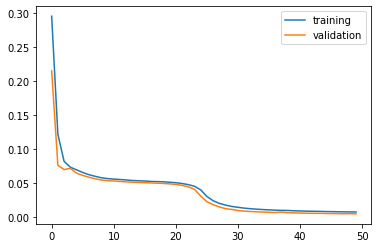

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [2 1 0]
group_bunches: [2446. 1864. 1725.]
group_bunches sorted: [1725. 1864. 2446.]
restore_index: [2 1 0]
group_bunches restored: [2446. 1864. 1725.]
bunch_sorted_index: [1 0 2]
group_bunches: [323. 221. 332.]
group_bunches sorted: [221. 323. 332.]
restore_index: [1 0 2]
group_bunches restored: [323. 221. 332.]
bunch_sorted_index: [2 0 1]
group_bunches: [706. 976. 342.]
group_bunches sorted: [342. 706. 976.]
restore_index: [1 2 0]
group_bunches restored: [706. 976. 342.]

50/50 [==============================] - 60s 1s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
585   Inst  6690     1     h  7 2018-05-16 09:49:14   
890   Inst  6610     1     h  7 2018-04-24 06:21:23   
7130  Inst  6253     1     h  7 2017-09-29 03:09:15   
6539  Inst  6272     1     h  7 2017-10-05 01:18:14   
2465  Inst  6600     1     h  7 2018-04-23 13:36:39   

                                                   file  n_bunches  \
585   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/...       1227   
890   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6610/...       1020   
7130  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6253/...       1916   
6539  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...        396   
2465  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6600/...       1380   

      bunch_index  bunch_number  ts_length  chunk  
585        2877.0         986.0      65536      2  
890         321.0         216.0      65536      3  
7130         93.0          43.0      65536     27  
6539        180.0          88.0      65536     25  
2465        184.0         140.0      65536      9

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 5s 986ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  6243     1     h  7 2017-09-26 09:00:15   
1244  Inst  6854     1     h  7 2018-06-27 23:18:14   
5767  Inst  6392     1     h  7 2017-11-16 07:52:13   
7206  Inst  7329     1     h  7 2018-10-22 13:29:40   
7624  Inst  6243     1     h  7 2017-09-26 09:00:15   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6243/...       1916   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6854/...       1227   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6392/...       1836   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7329/...        168   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6243/...       1916   

      bunch_index  bunch_number  ts_length  chunk  
4808       2412.0        1331.0      65536     18  
1244       2375.0         925.0      65536      4  
5767        407.0         187.0      65536     22  
7206       1052.0         113.0      65536     28  
7624       2412.0        1331.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

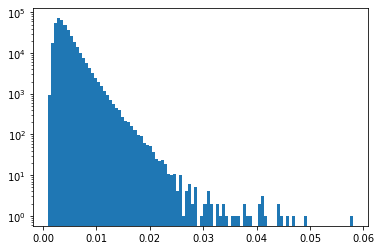

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

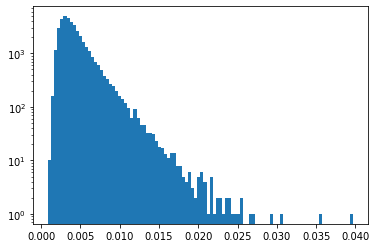

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.004891774086027876
type                                                         Inst
fill                                                         6690
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 09:49:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/...
n_bunches                                                    1227
bunch_index                                                  2877
bunch_number                                                  986
ts_length                                                   65536
chunk                                                           2
Name: 585, dtype: object


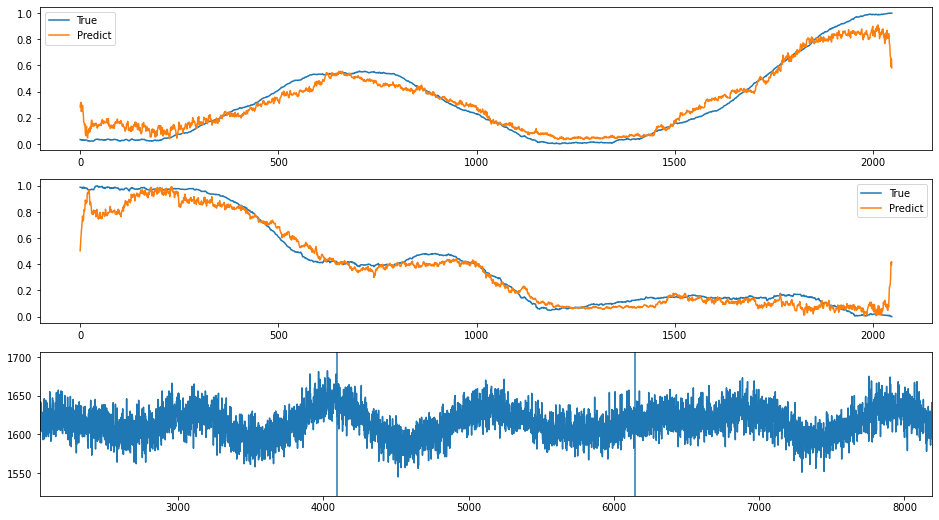

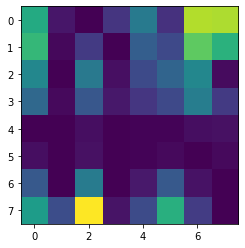

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 365469
Error: 0.001003770871263669
type                                                         Inst
fill                                                         7333
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-22 22:15:42
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7333/...
n_bunches                                                     924
bunch_index                                                   642
bunch_number                                                  458
ts_length                                                   65536
chunk                                                           6
Name: 1765, dtype: object


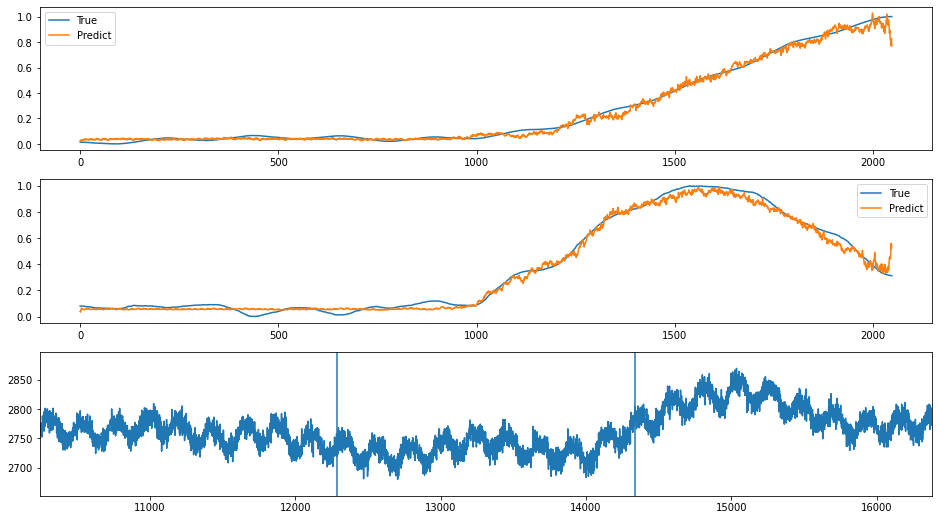

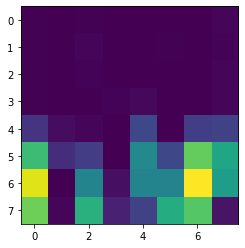

index: 19849
Error: 0.0010076367335333106
type                                                         Inst
fill                                                         6851
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-27 02:04:23
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6851/...
n_bunches                                                       1
bunch_index                                                     0
bunch_number                                                    0
ts_length                                                   65536
chunk                                                           4
Name: 1222, dtype: object


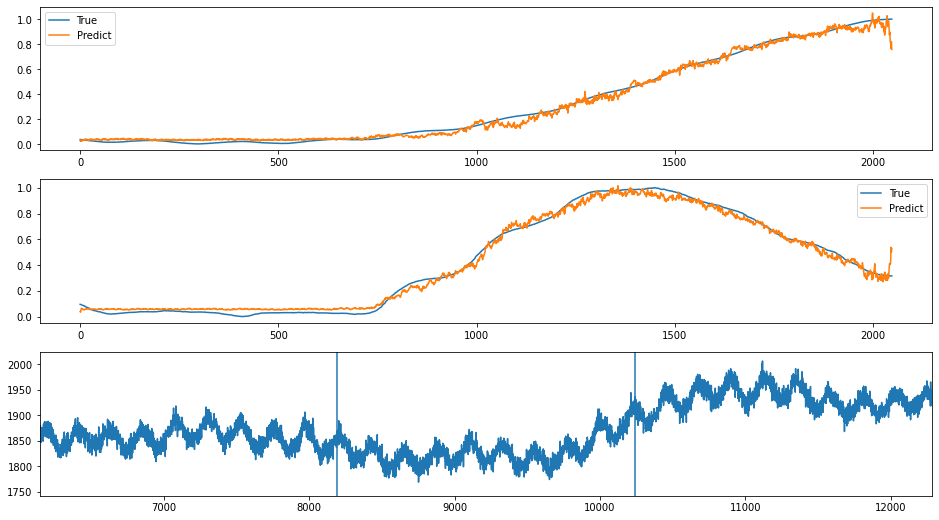

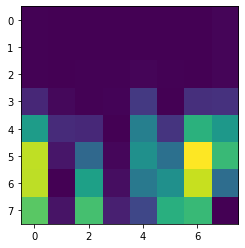

index: 272849
Error: 0.001008315879827579
type                                                         Inst
fill                                                         7017
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-03 22:21:00
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7017/...
n_bunches                                                    2556
bunch_index                                                   293
bunch_number                                                  199
ts_length                                                   65536
chunk                                                          20
Name: 5205, dtype: object


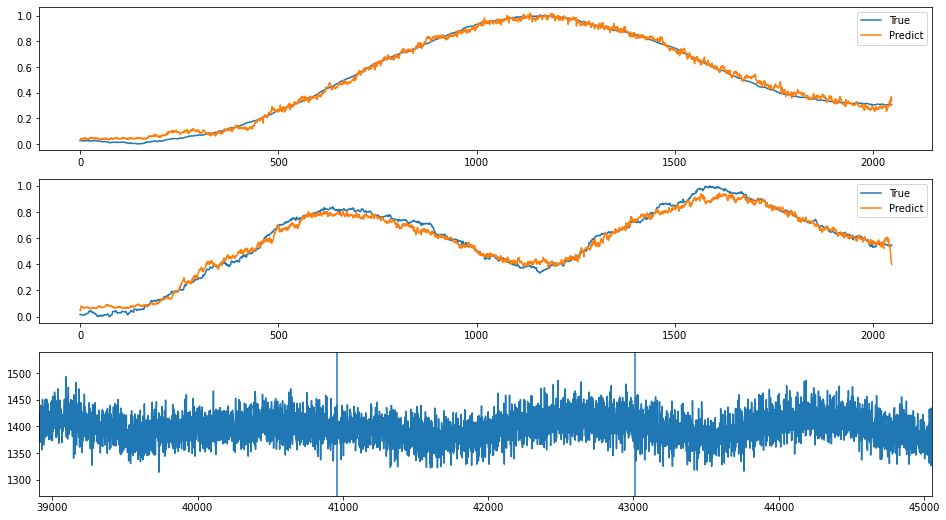

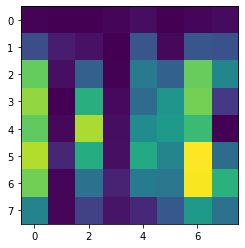

index: 85598
Error: 0.001031730026194441
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:32:40
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     302
bunch_index                                                   566
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          22
Name: 5659, dtype: object


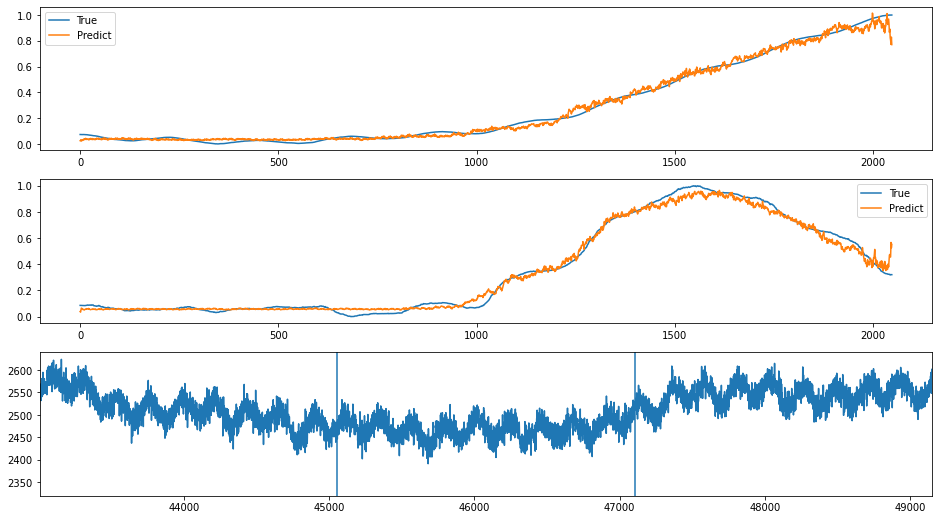

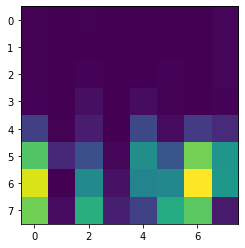

index: 189520
Error: 0.0010407403506326705
type                                                         Inst
fill                                                         7108
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-31 04:53:42
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7108/...
n_bunches                                                     924
bunch_index                                                   271
bunch_number                                                  177
ts_length                                                   65536
chunk                                                          14
Name: 3623, dtype: object


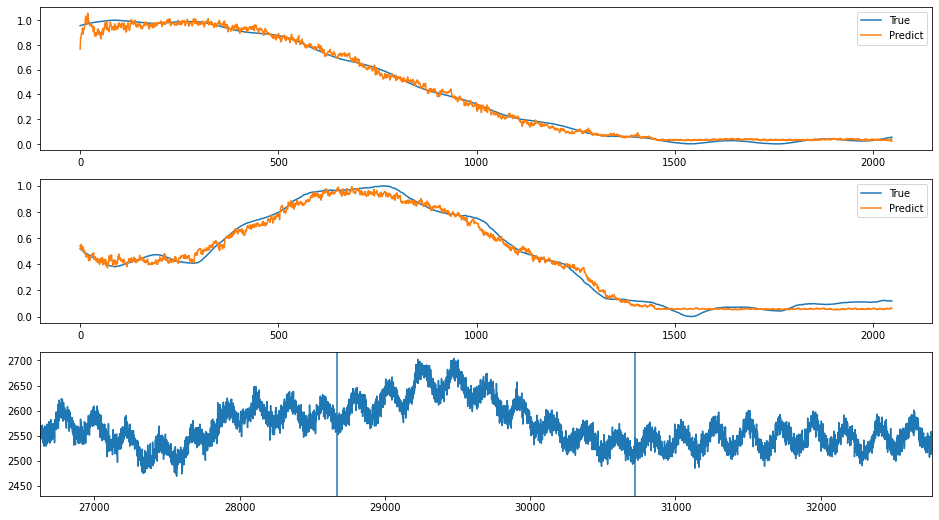

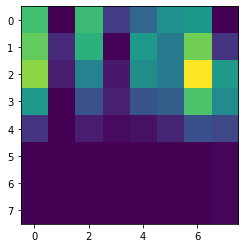

index: 47764
Error: 0.001067741454846862
type                                                         Inst
fill                                                         6724
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-25 17:42:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6724/...
n_bunches                                                     252
bunch_index                                                   160
bunch_number                                                   85
ts_length                                                   65536
chunk                                                          15
Name: 3901, dtype: object


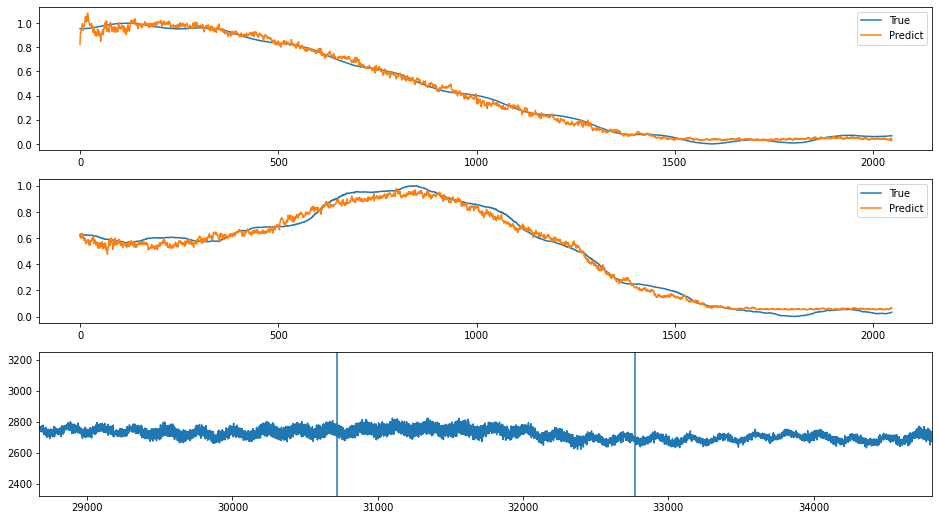

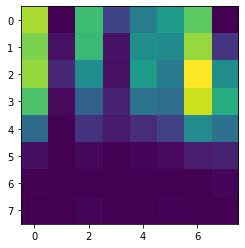

index: 98605
Error: 0.0010712741056479779
type                                                         Inst
fill                                                         7479
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-27 21:25:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7479/...
n_bunches                                                     313
bunch_index                                                  1176
bunch_number                                                  246
ts_length                                                   65536
chunk                                                           8
Name: 2151, dtype: object


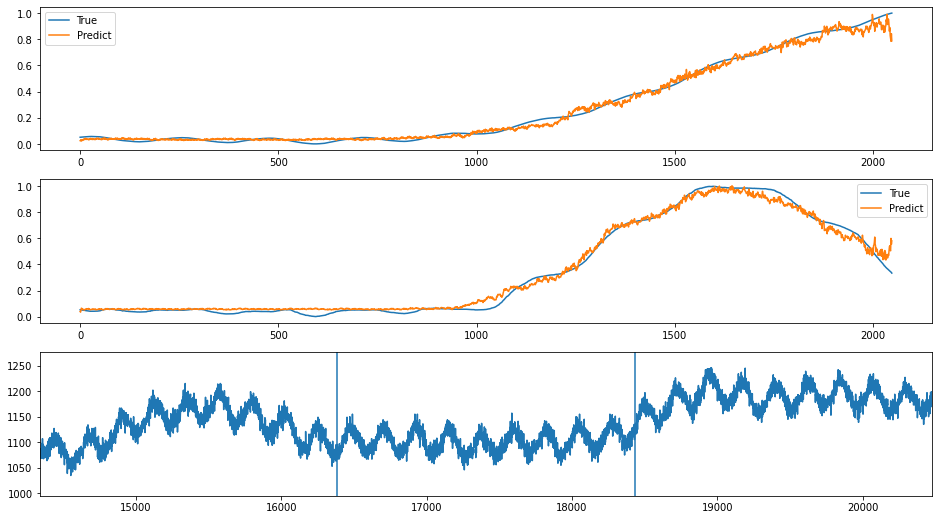

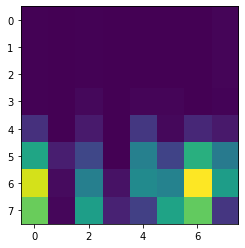

index: 56493
Error: 0.0010761848735022844
type                                                         Inst
fill                                                         7110
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-31 21:58:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7110/...
n_bunches                                                     540
bunch_index                                                   283
bunch_number                                                  189
ts_length                                                   65536
chunk                                                           4
Name: 1185, dtype: object


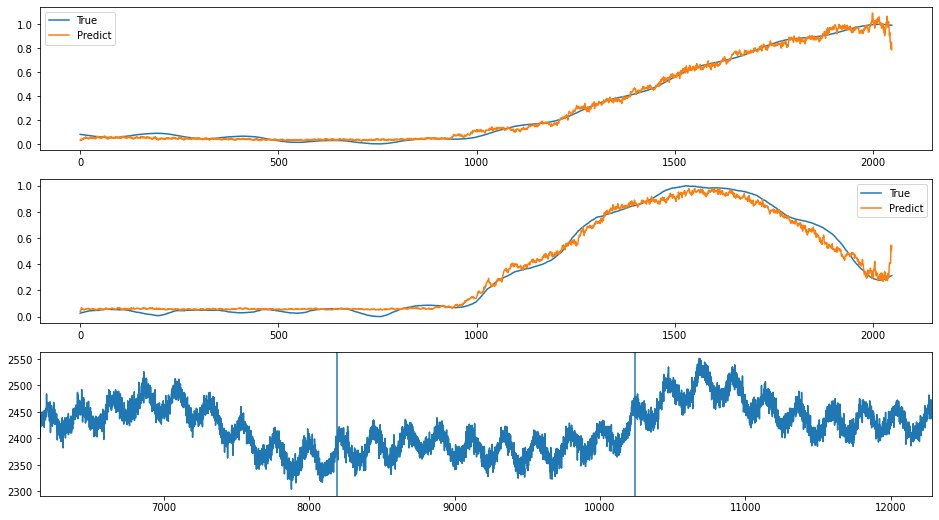

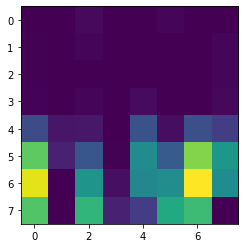

index: 19467
Error: 0.0010788647798220259
type                                                         Inst
fill                                                         6749
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-01 03:53:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6749/...
n_bunches                                                     780
bunch_index                                                    95
bunch_number                                                   27
ts_length                                                   65536
chunk                                                          20
Name: 5351, dtype: object


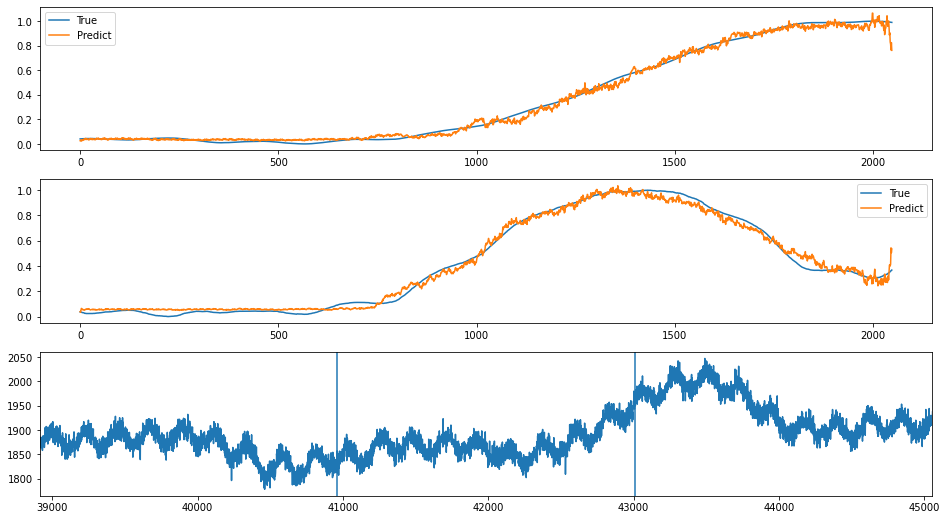

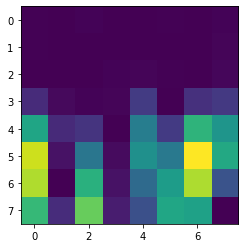

index: 184106
Error: 0.0010841216249928164
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-13 05:38:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                     252
bunch_index                                                    69
bunch_number                                                   20
ts_length                                                   65536
chunk                                                          24
Name: 6321, dtype: object


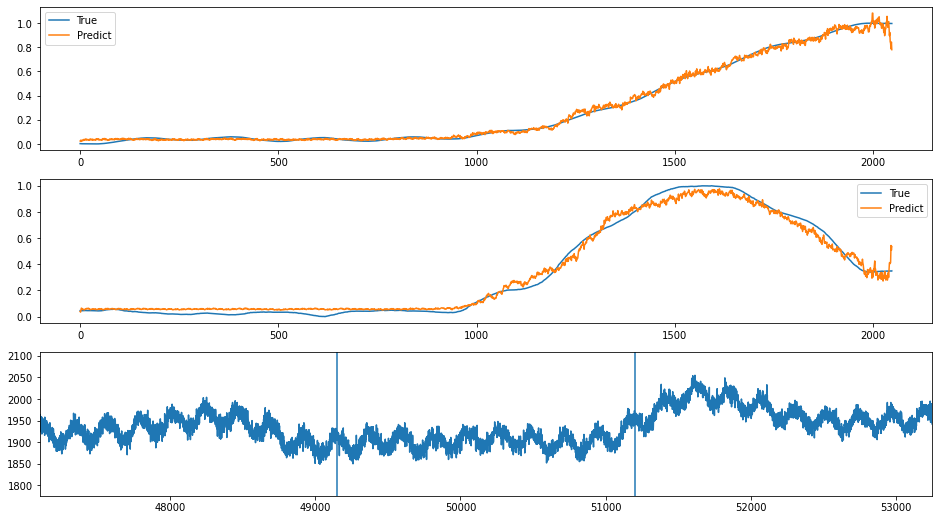

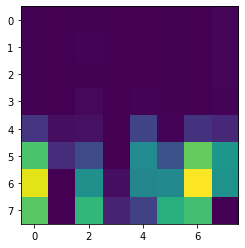

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 286148
Error: 0.05796874327142888
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          19
Name: 5070, dtype: object


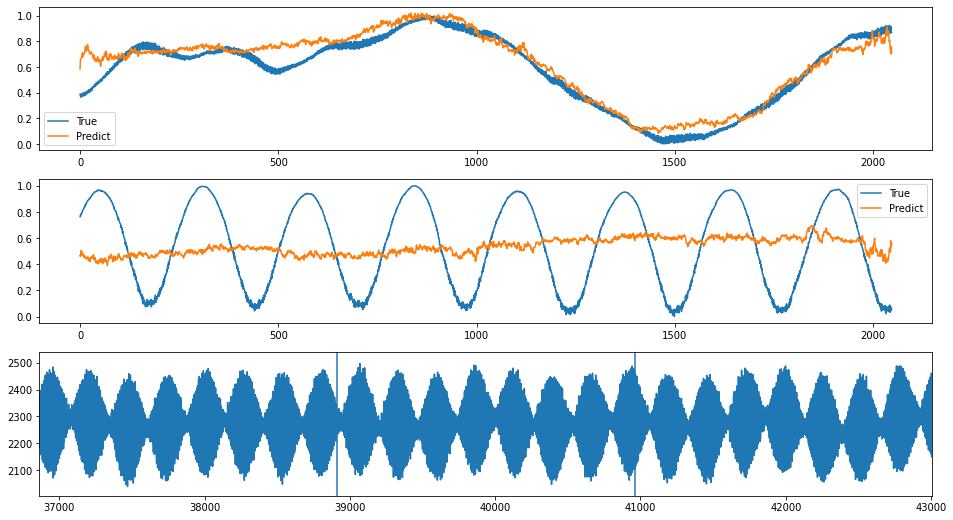

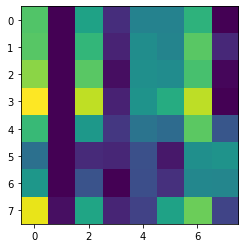

index: 289622
Error: 0.048870525593458586
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          26
Name: 6862, dtype: object


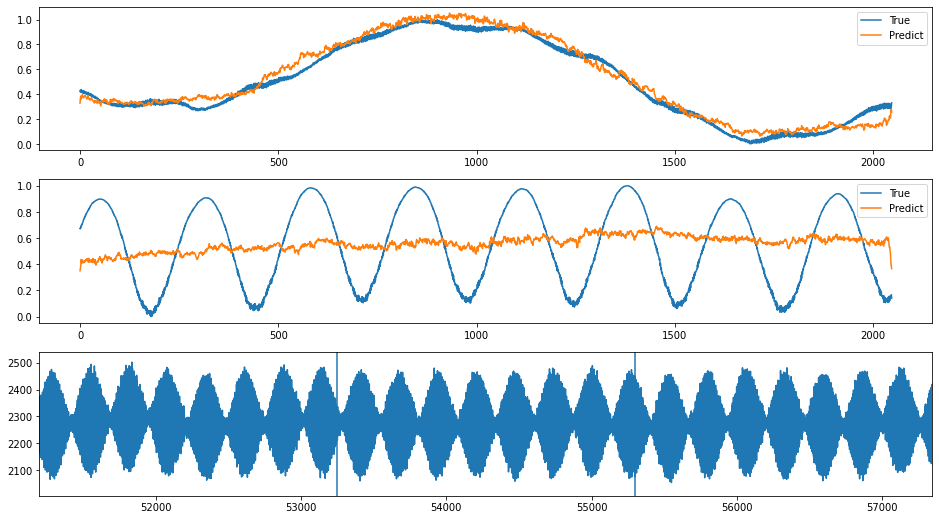

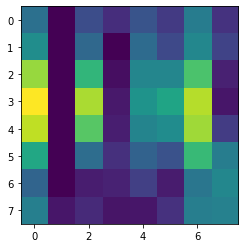

index: 290707
Error: 0.04697382404683219
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          29
Name: 7630, dtype: object


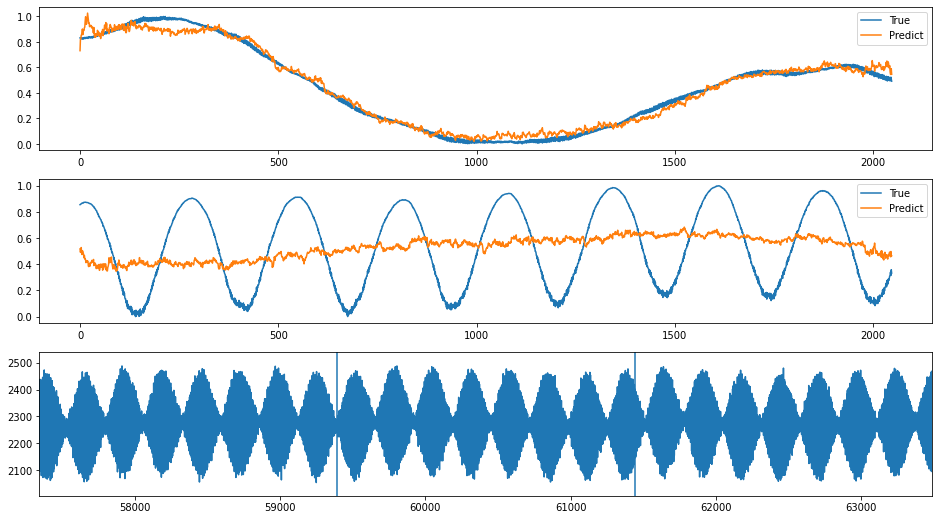

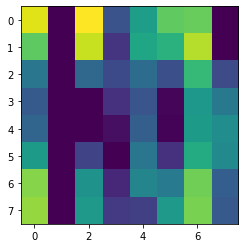

index: 286131
Error: 0.04572910190167144
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          28
Name: 7374, dtype: object


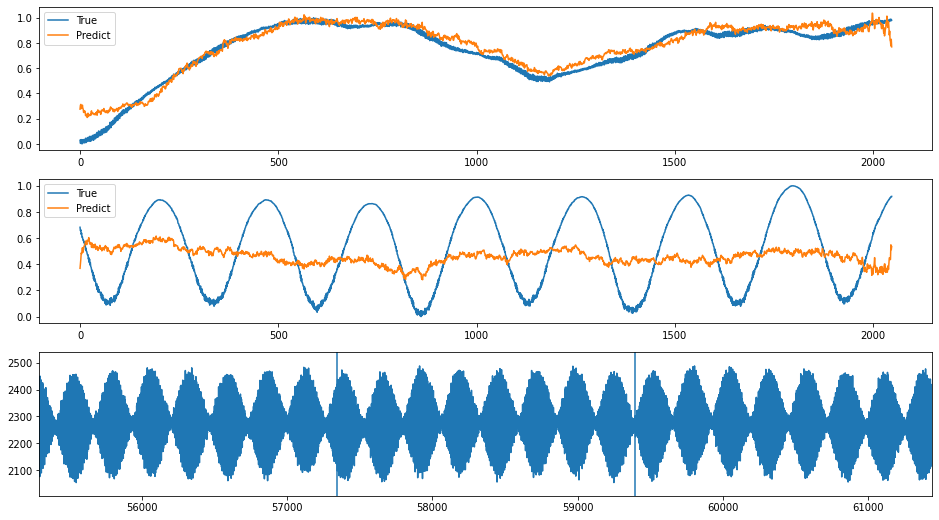

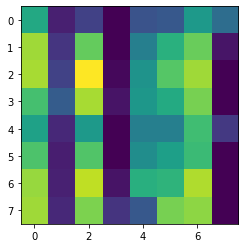

index: 288055
Error: 0.04462467368473032
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          16
Name: 4302, dtype: object


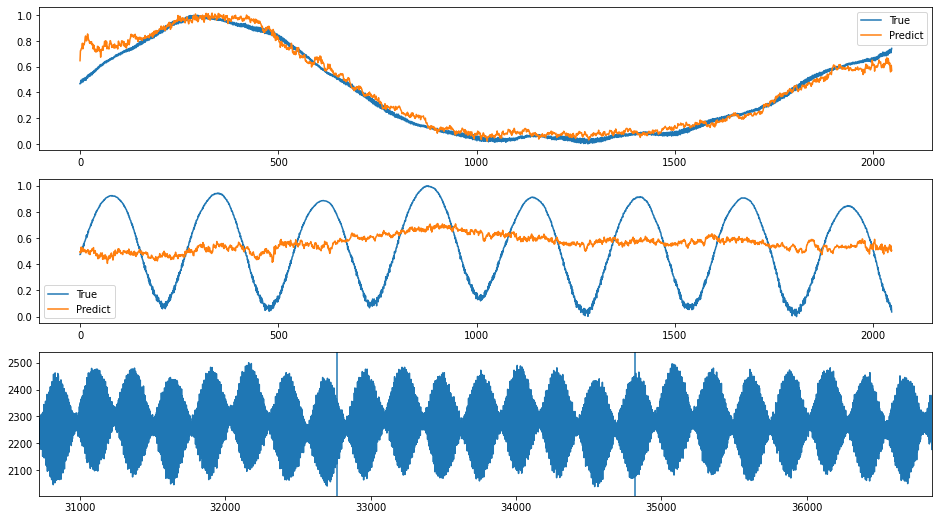

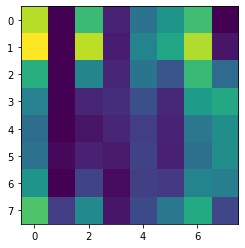

index: 290014
Error: 0.04429148476451942
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          27
Name: 7118, dtype: object


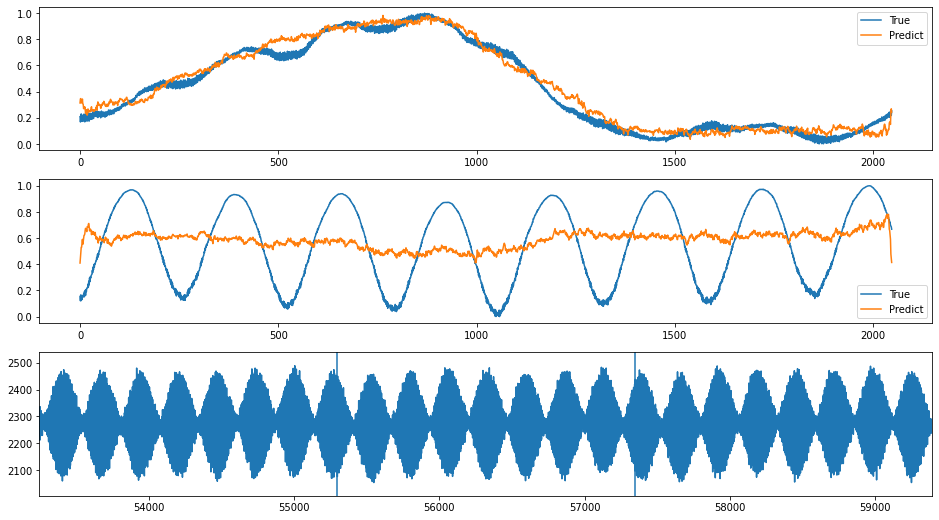

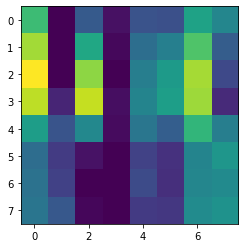

index: 293531
Error: 0.04397757880459966
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                           3
Name: 974, dtype: object


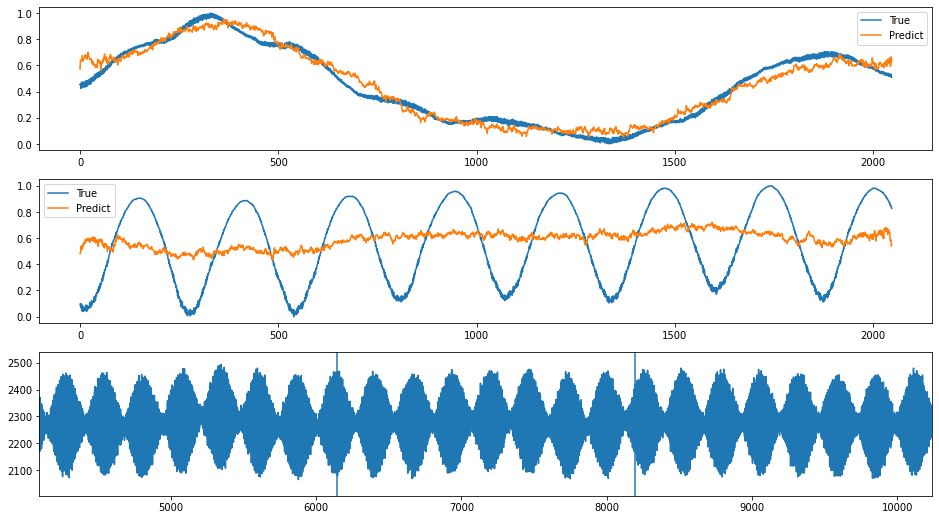

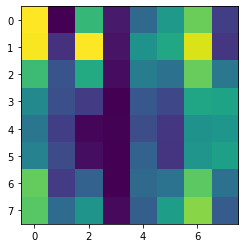

index: 290633
Error: 0.04190456903401961
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                           2
Name: 718, dtype: object


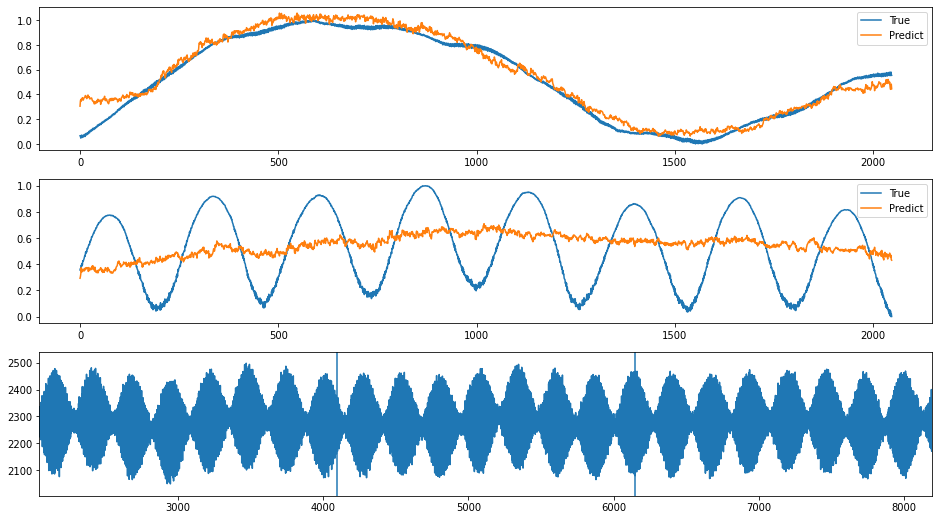

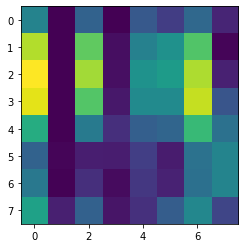

index: 291965
Error: 0.04135073626917954
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                           6
Name: 1742, dtype: object


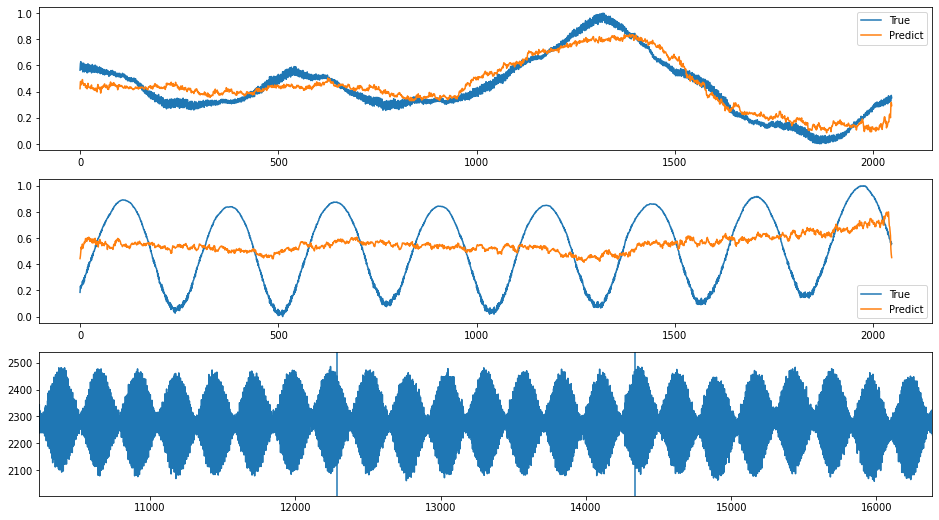

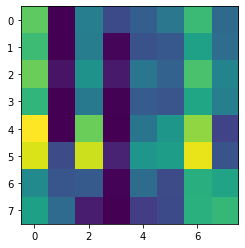

index: 285863
Error: 0.04130410462115967
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          21
Name: 5582, dtype: object


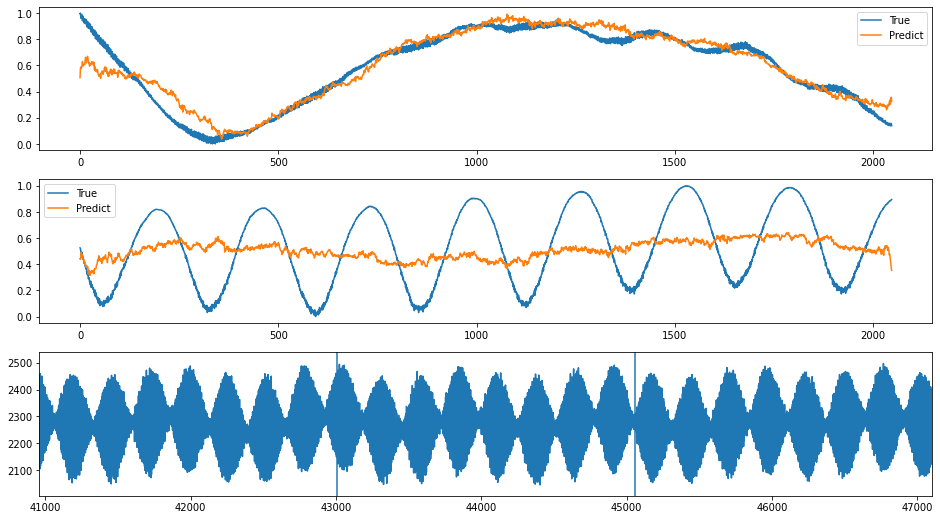

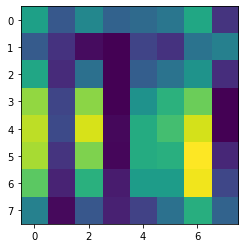

index: 291847
Error: 0.040991004142121576
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                           4
Name: 1230, dtype: object


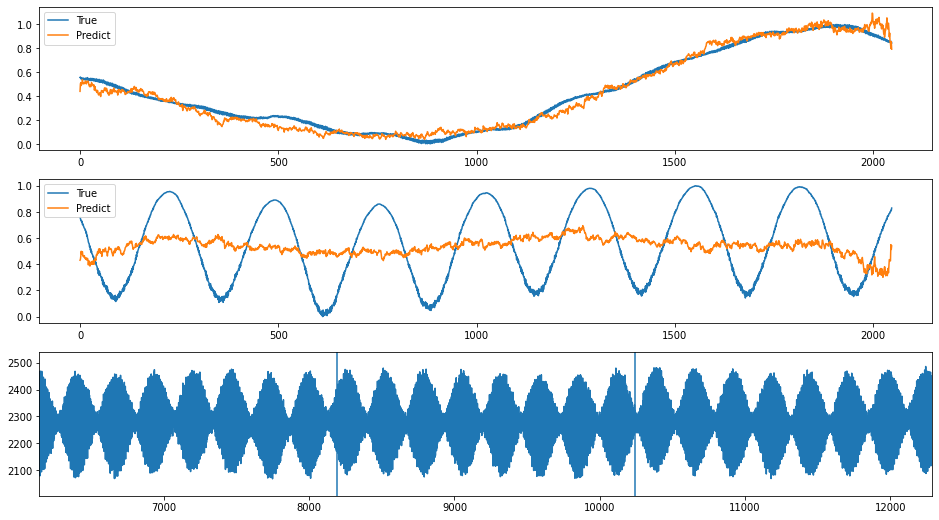

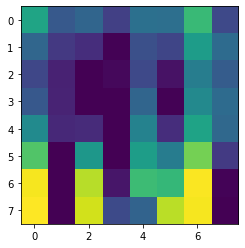

index: 290139
Error: 0.0404356604274998
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          18
Name: 4814, dtype: object


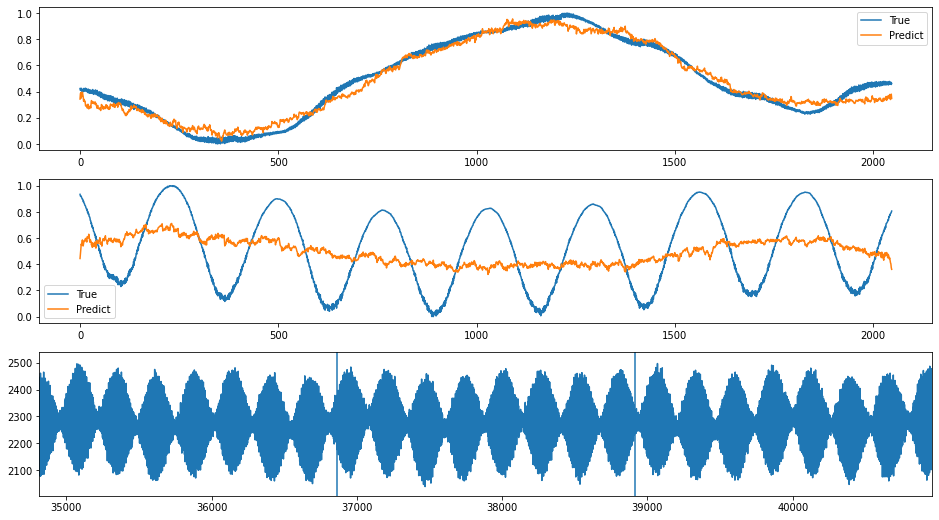

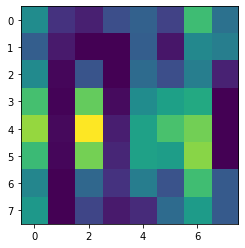

index: 286216
Error: 0.0404197751813172
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          25
Name: 6606, dtype: object


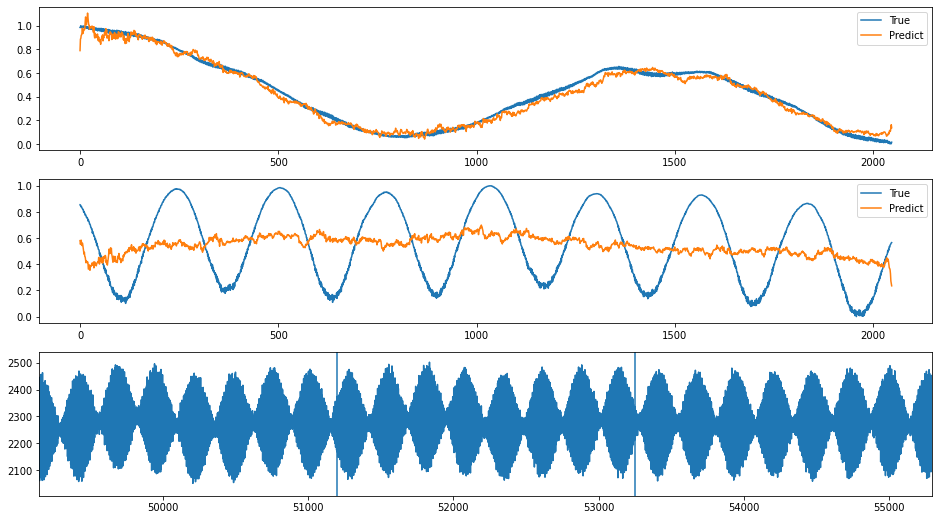

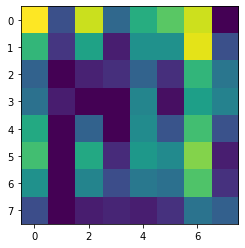

index: 286764
Error: 0.03901215909836269
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          24
Name: 6350, dtype: object


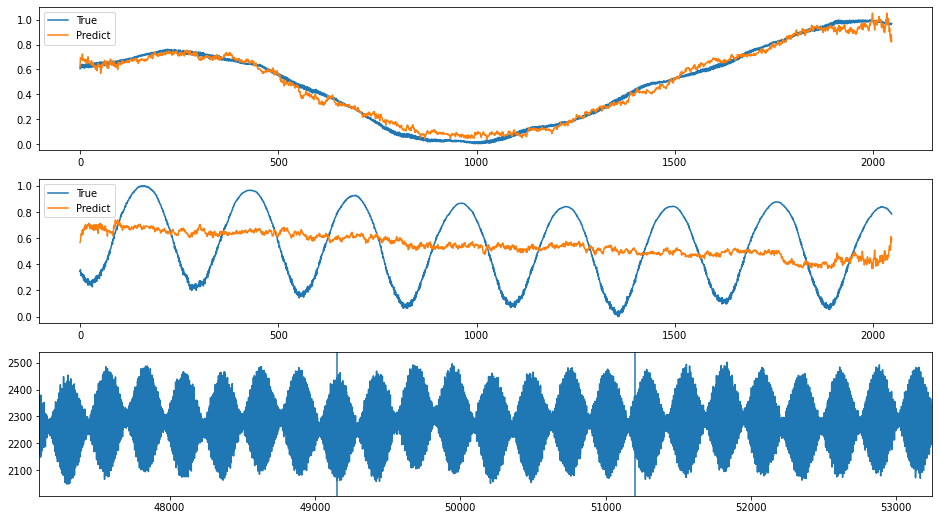

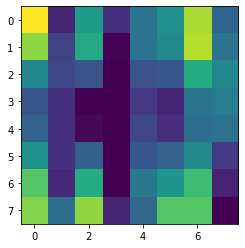

index: 288405
Error: 0.038289553342521036
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                           5
Name: 1486, dtype: object


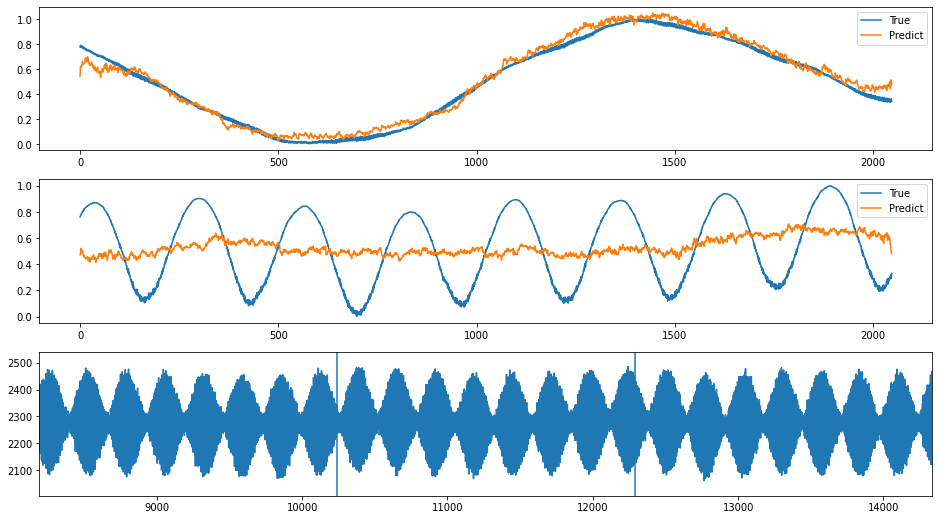

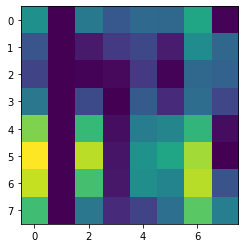

index: 287519
Error: 0.037537307363595264
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          22
Name: 5838, dtype: object


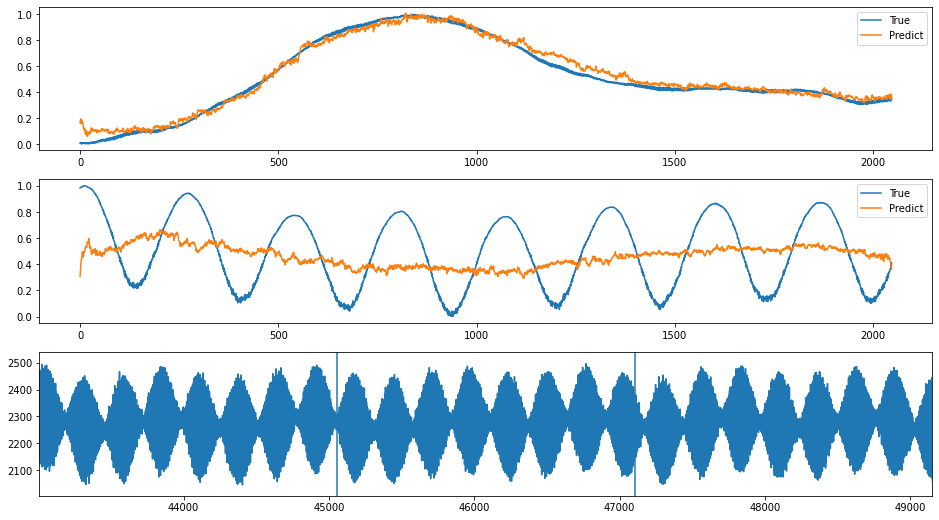

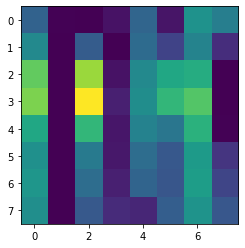

index: 289262
Error: 0.03750552093557033
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          23
Name: 6094, dtype: object


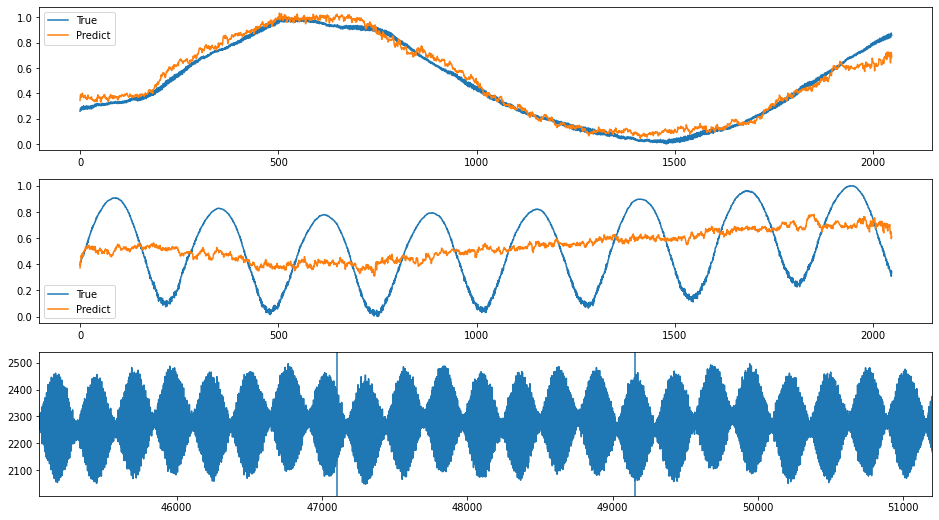

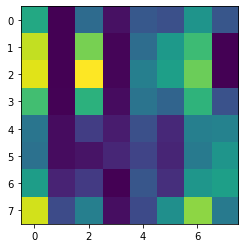

index: 40703
Error: 0.036428774395752296
type                                                         Inst
fill                                                         7452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-17 16:33:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7452/...
n_bunches                                                     612
bunch_index                                                   459
bunch_number                                                   81
ts_length                                                   65536
chunk                                                          17
Name: 4588, dtype: object


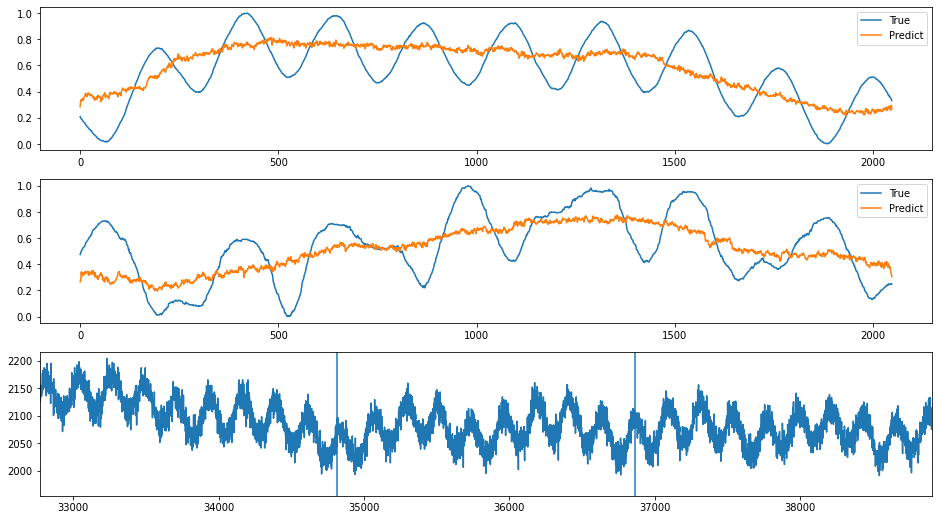

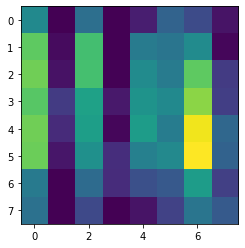

index: 360253
Error: 0.03588349827369529
type                                                         Inst
fill                                                         7157
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-13 01:44:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7157/...
n_bunches                                                     732
bunch_index                                                   376
bunch_number                                                  268
ts_length                                                   65536
chunk                                                          13
Name: 3411, dtype: object


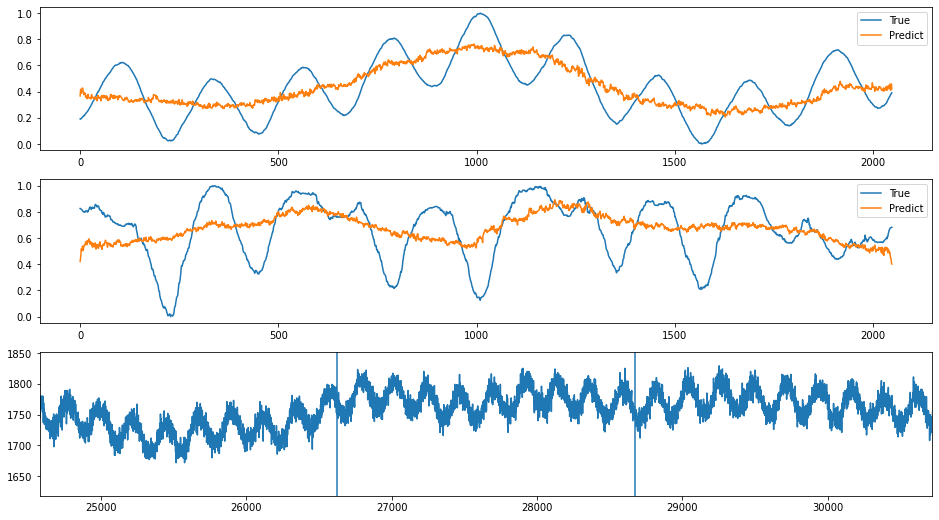

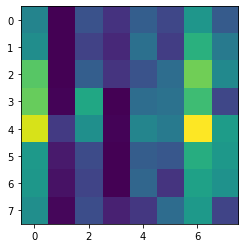

index: 288153
Error: 0.035718648923678396
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                           8
Name: 2254, dtype: object


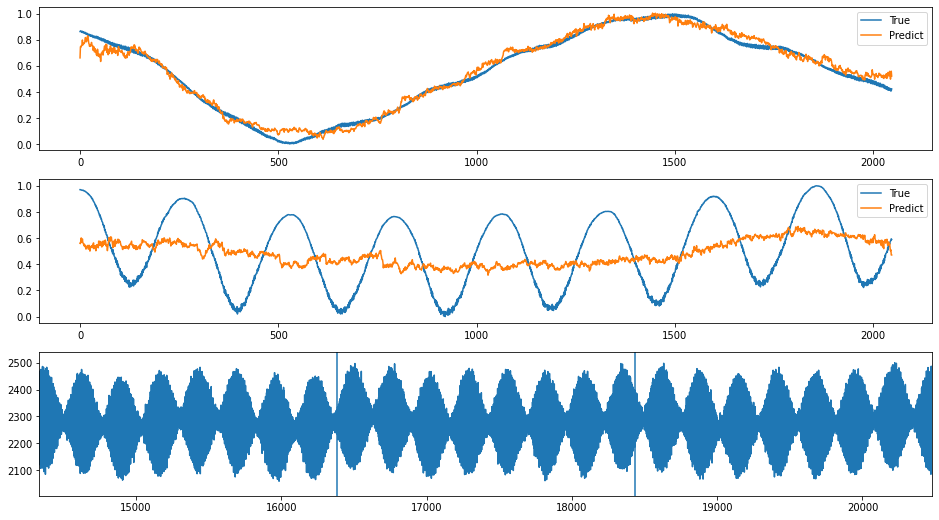

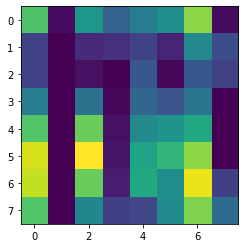

index: 285786
Error: 0.034195188337907544
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          17
Name: 4558, dtype: object


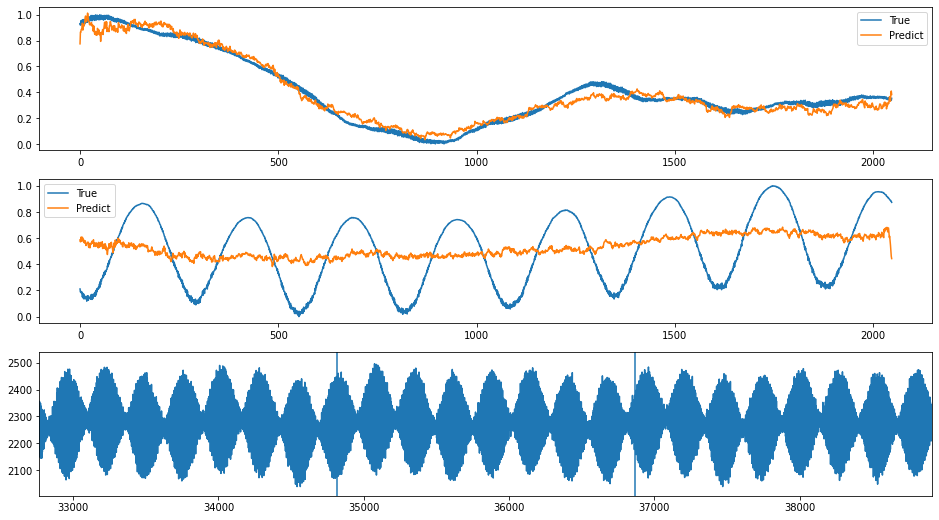

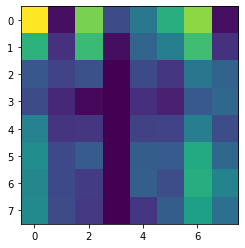

index: 287844
Error: 0.033799660693756284
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          30
Name: 7886, dtype: object


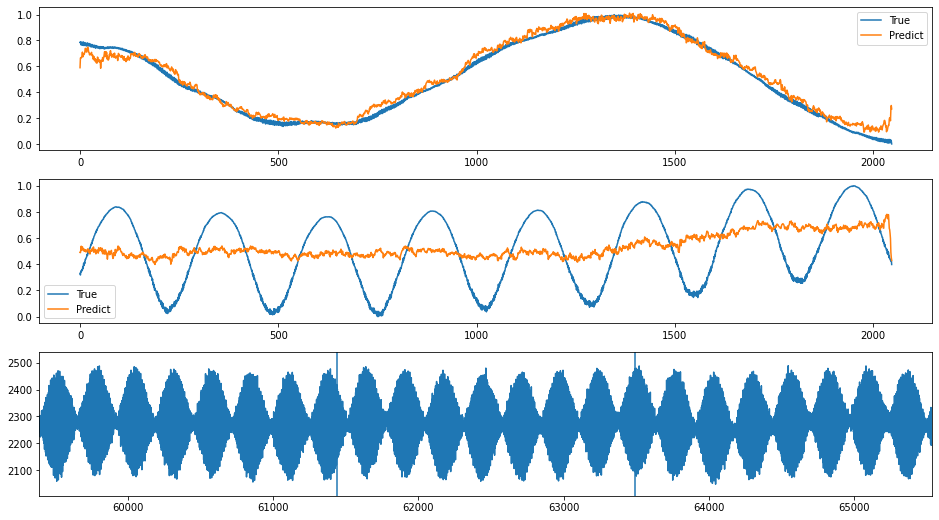

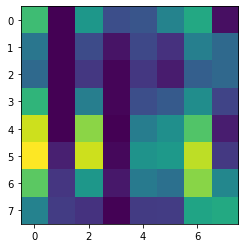

index: 286628
Error: 0.033737883061558296
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          15
Name: 4046, dtype: object


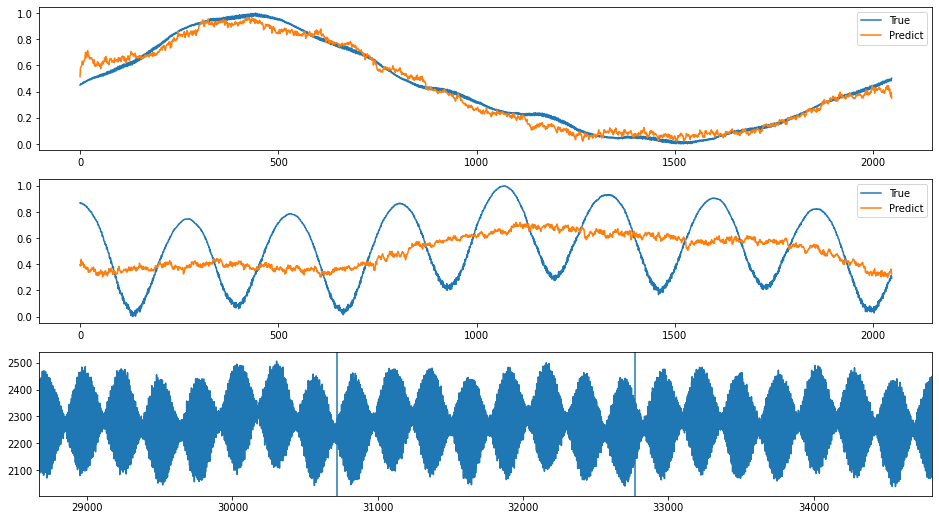

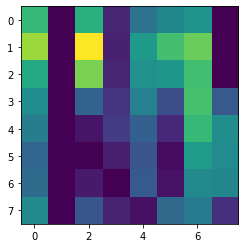

index: 293385
Error: 0.033417449118356826
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                           7
Name: 1998, dtype: object


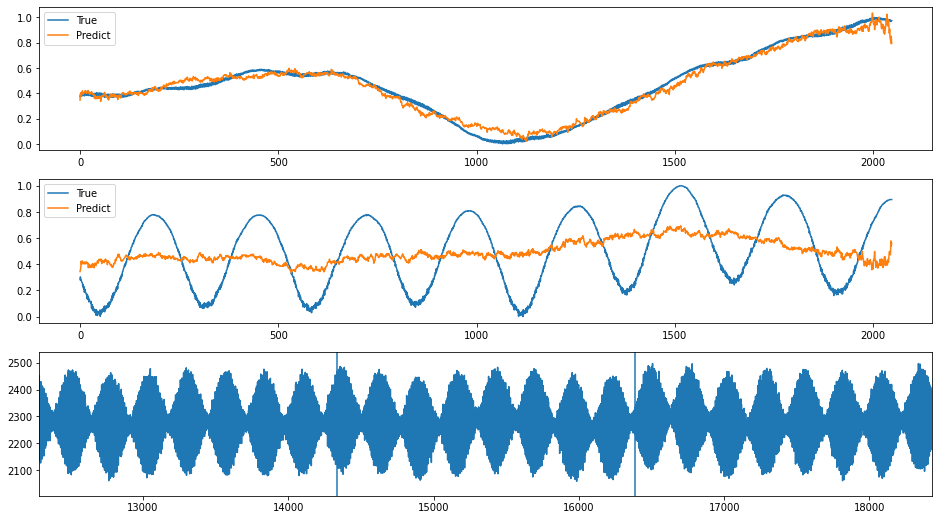

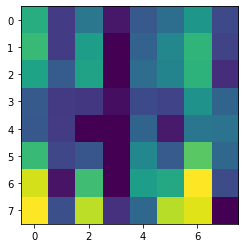

index: 289671
Error: 0.03248875328774538
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                           0
Name: 206, dtype: object


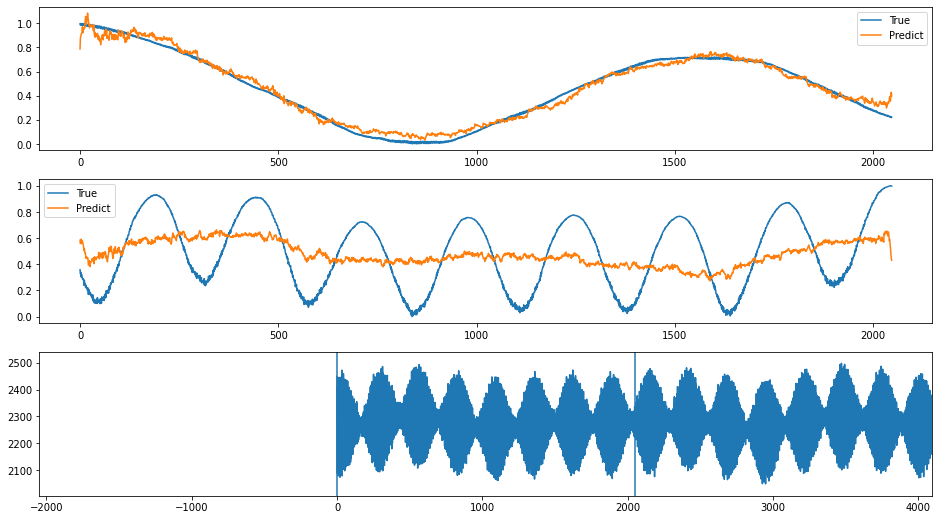

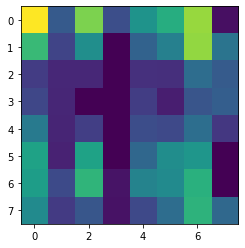

index: 293218
Error: 0.03245177990089211
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                           9
Name: 2510, dtype: object


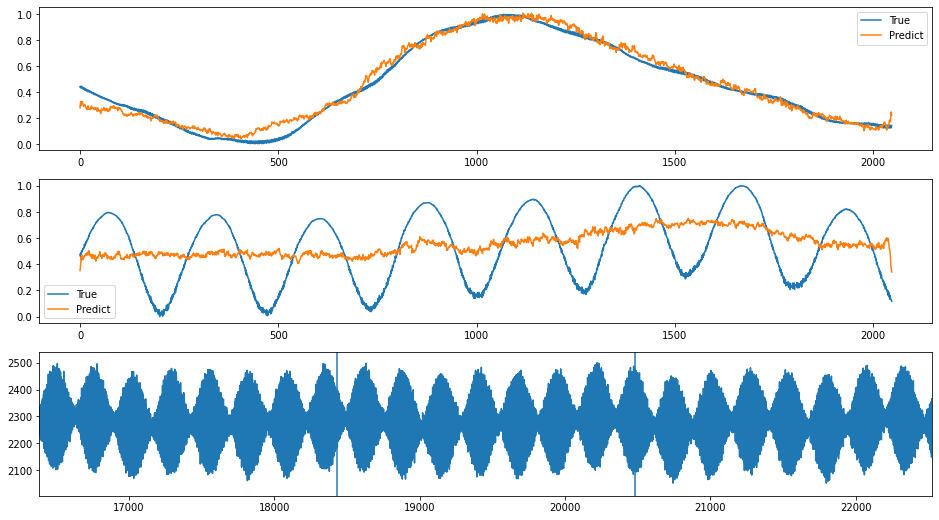

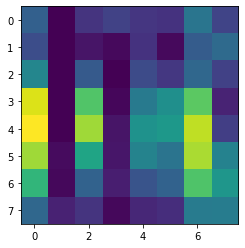

index: 56224
Error: 0.03172046542164128
type                                                         Inst
fill                                                         6343
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-28 06:39:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6343/...
n_bunches                                                     172
bunch_index                                                    74
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          29
Name: 7617, dtype: object


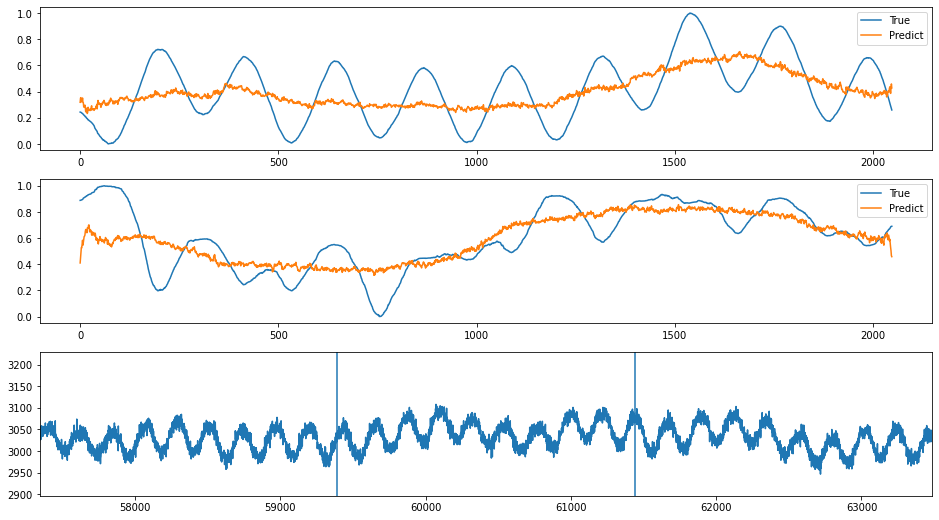

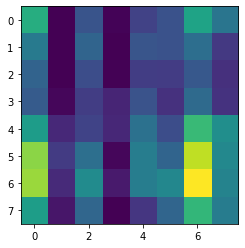

index: 278486
Error: 0.03145203298785646
type                                                         Inst
fill                                                         6457
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 19:48:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6457/...
n_bunches                                                    1020
bunch_index                                                   980
bunch_number                                                  715
ts_length                                                   65536
chunk                                                           6
Name: 1780, dtype: object


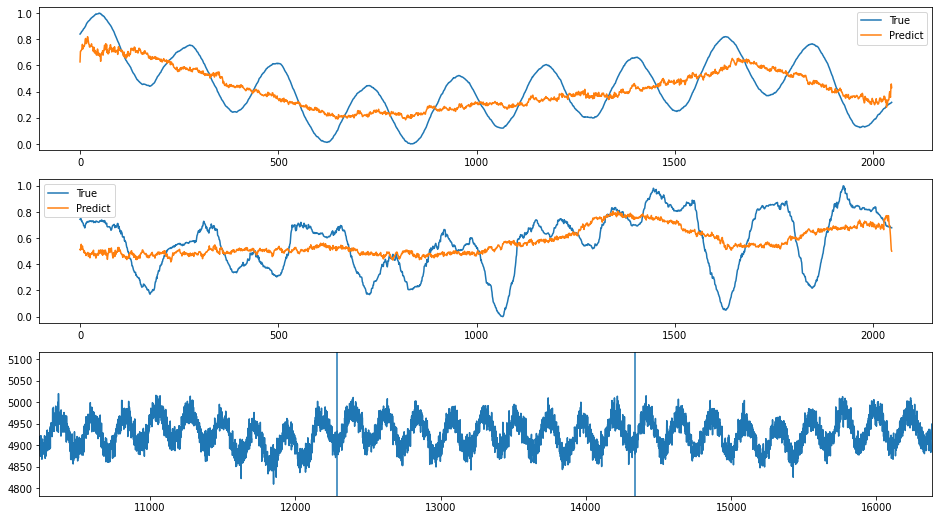

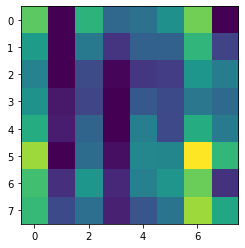

index: 365584
Error: 0.03097287509987716
type                                                         Inst
fill                                                         7043
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-11 07:51:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7043/...
n_bunches                                                     540
bunch_index                                                   463
bunch_number                                                  324
ts_length                                                   65536
chunk                                                          14
Name: 3773, dtype: object


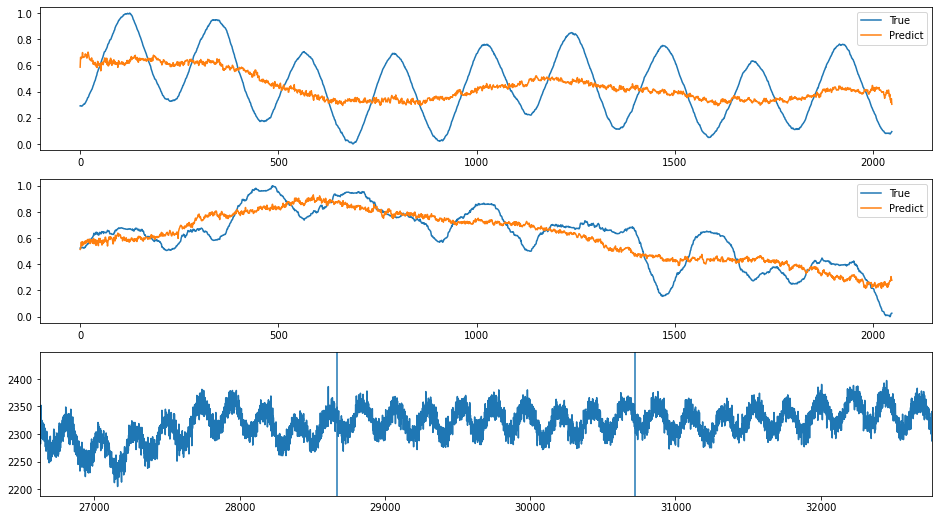

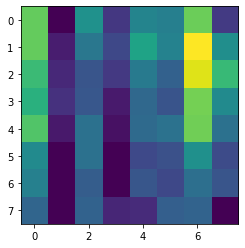

index: 83603
Error: 0.03077238823623588
type                                                         Inst
fill                                                         7466
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-22 17:49:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7466/...
n_bunches                                                     313
bunch_index                                                   503
bunch_number                                                  105
ts_length                                                   65536
chunk                                                           5
Name: 1353, dtype: object


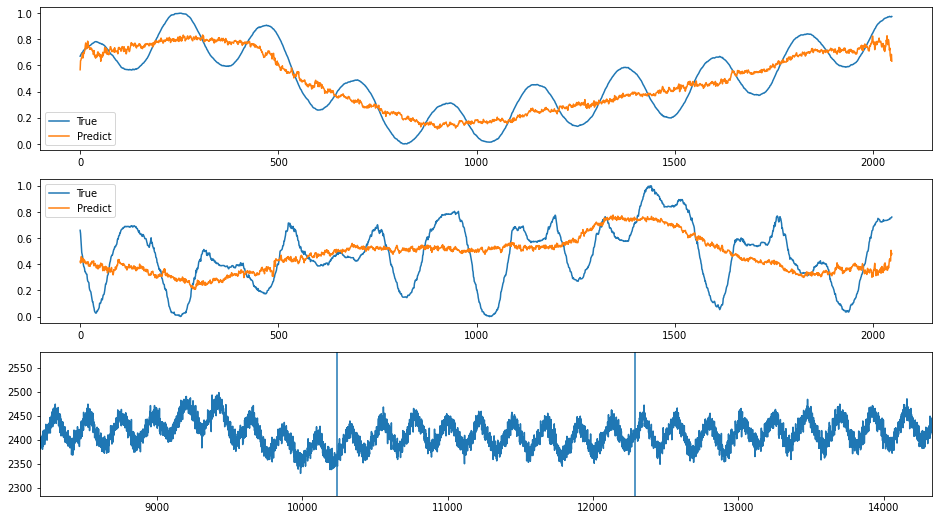

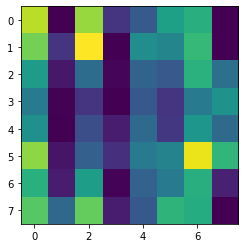

index: 289112
Error: 0.03067370121447829
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:05:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   532
bunch_number                                                   35
ts_length                                                   65536
chunk                                                          11
Name: 2980, dtype: object


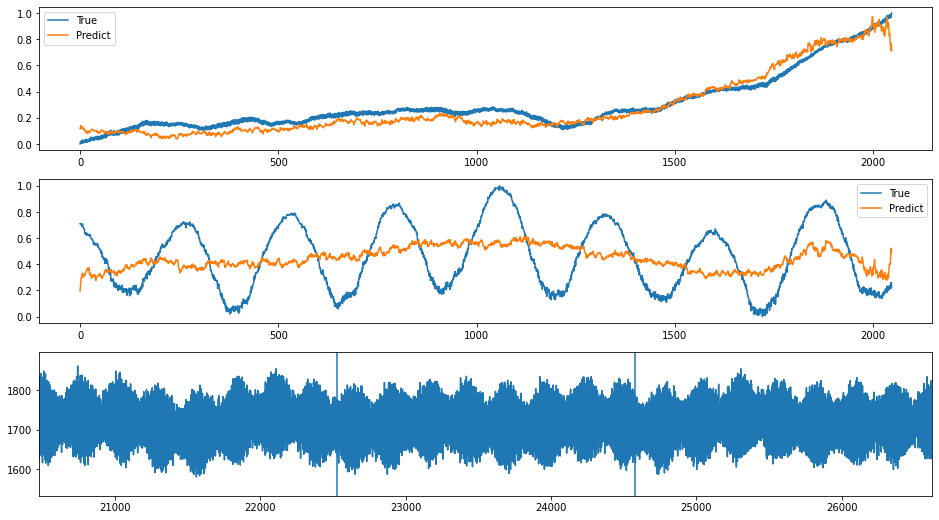

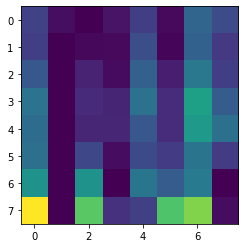

index: 77592
Error: 0.030653730838668927
type                                                         Inst
fill                                                         7139
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-08 19:17:08
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7139/...
n_bunches                                                    2556
bunch_index                                                  3068
bunch_number                                                 2270
ts_length                                                   65536
chunk                                                          24
Name: 6225, dtype: object


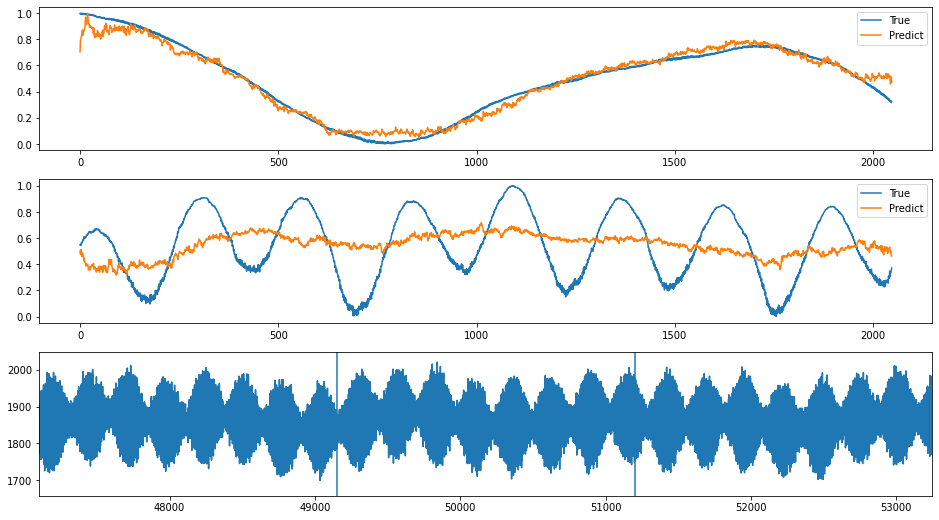

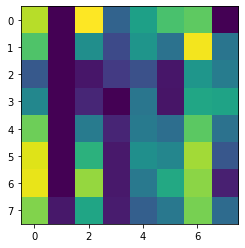

index: 194344
Error: 0.030182299894557268
type                                                         Inst
fill                                                         6337
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-27 05:27:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6337/...
n_bunches                                                    1004
bunch_index                                                   830
bunch_number                                                  433
ts_length                                                   65536
chunk                                                          13
Name: 3471, dtype: object


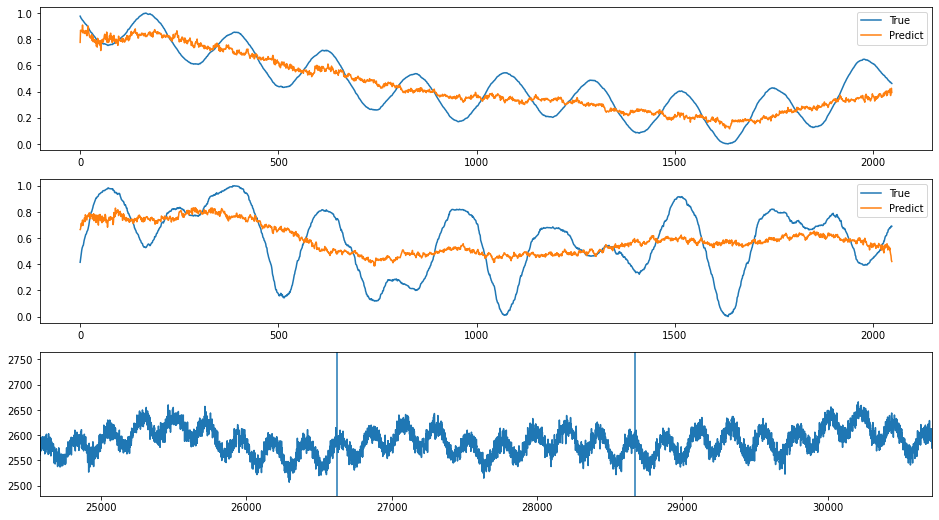

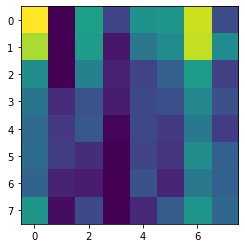

index: 237495
Error: 0.030117898307514806
type                                                         Inst
fill                                                         7479
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-27 21:24:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7479/...
n_bunches                                                     271
bunch_index                                                  1212
bunch_number                                                  255
ts_length                                                   65536
chunk                                                          15
Name: 4004, dtype: object


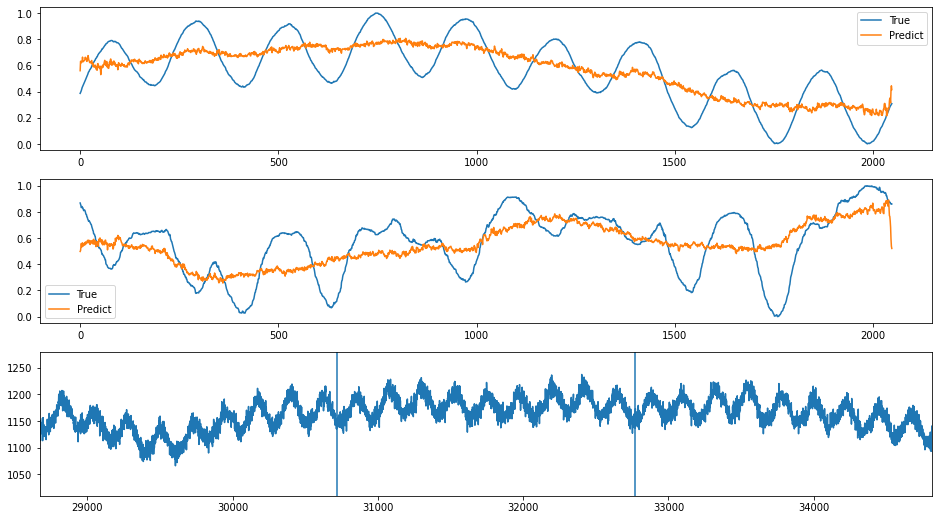

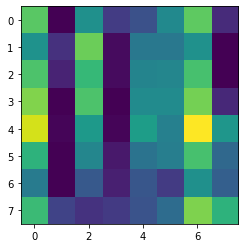

index: 321051
Error: 0.02996566032521745
type                                                         Inst
fill                                                         6220
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-17 23:20:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6220/...
n_bunches                                                     228
bunch_index                                                  2776
bunch_number                                                  206
ts_length                                                   65536
chunk                                                          29
Name: 7623, dtype: object


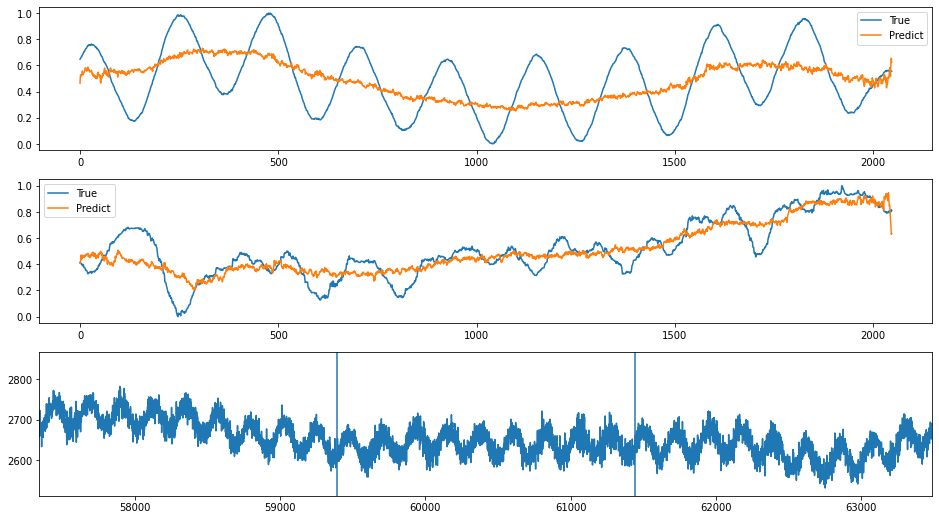

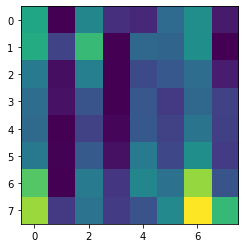

index: 71869
Error: 0.028737354518355893
type                                                         Inst
fill                                                         7139
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-08 19:17:08
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7139/...
n_bunches                                                    2556
bunch_index                                                  3068
bunch_number                                                 2270
ts_length                                                   65536
chunk                                                          13
Name: 3409, dtype: object


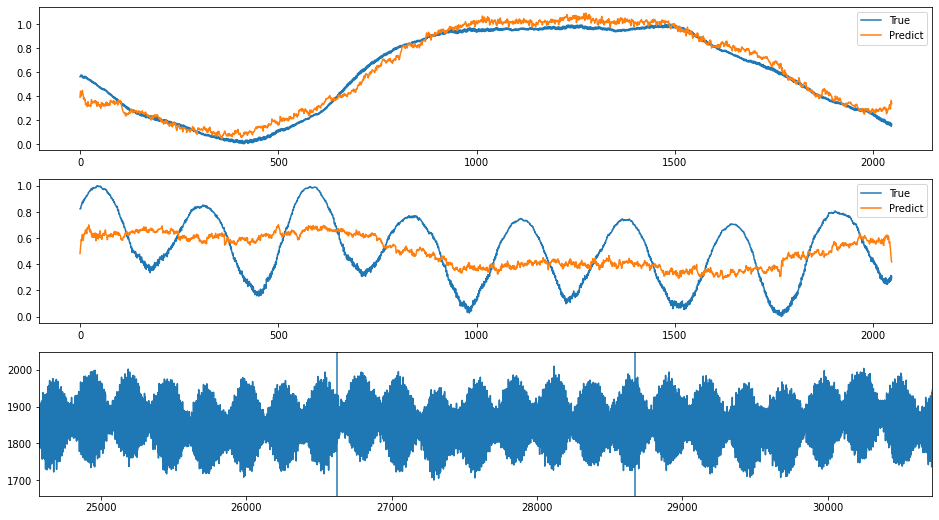

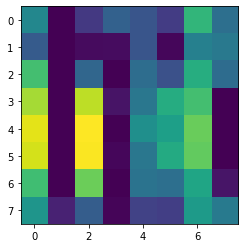

index: 174491
Error: 0.028551599999279066
type                                                         Inst
fill                                                         7043
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-11 08:44:30
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7043/...
n_bunches                                                     636
bunch_index                                                   518
bunch_number                                                  372
ts_length                                                   65536
chunk                                                          11
Name: 2902, dtype: object


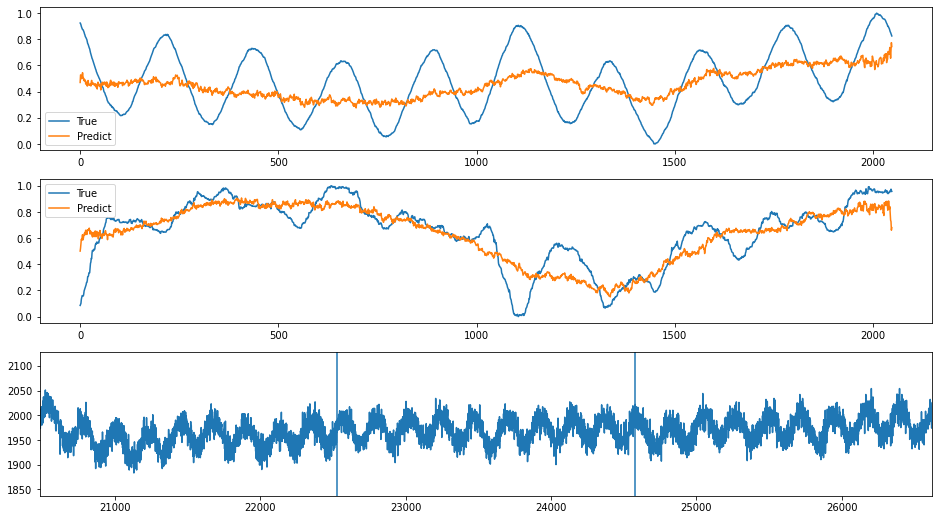

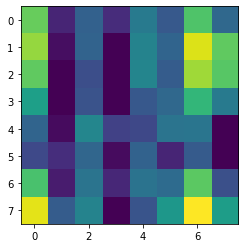

index: 286640
Error: 0.028521823388541118
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                           1
Name: 462, dtype: object


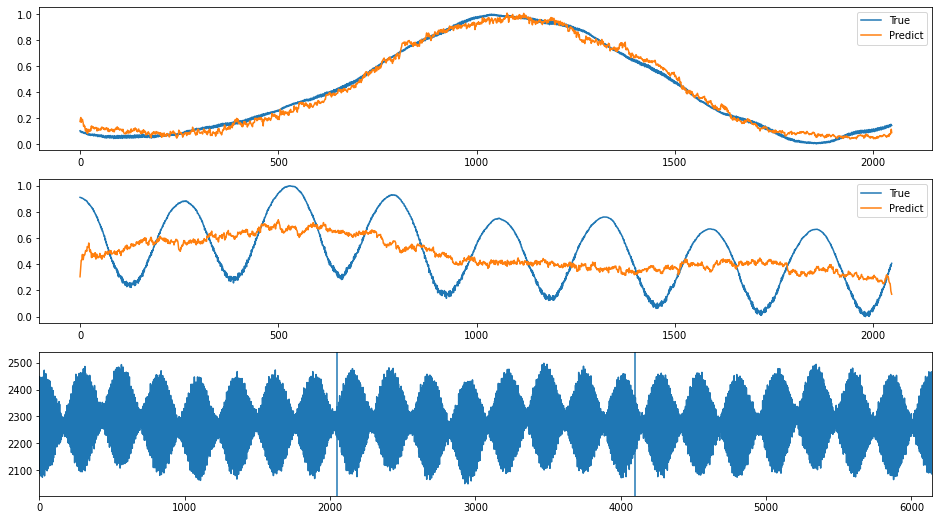

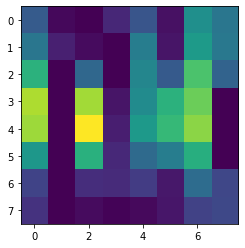

index: 154607
Error: 0.02838087112573044
type                                                         Inst
fill                                                         7382
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 01:53:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7382/...
n_bunches                                                     156
bunch_index                                                   956
bunch_number                                                   61
ts_length                                                   65536
chunk                                                           2
Name: 571, dtype: object


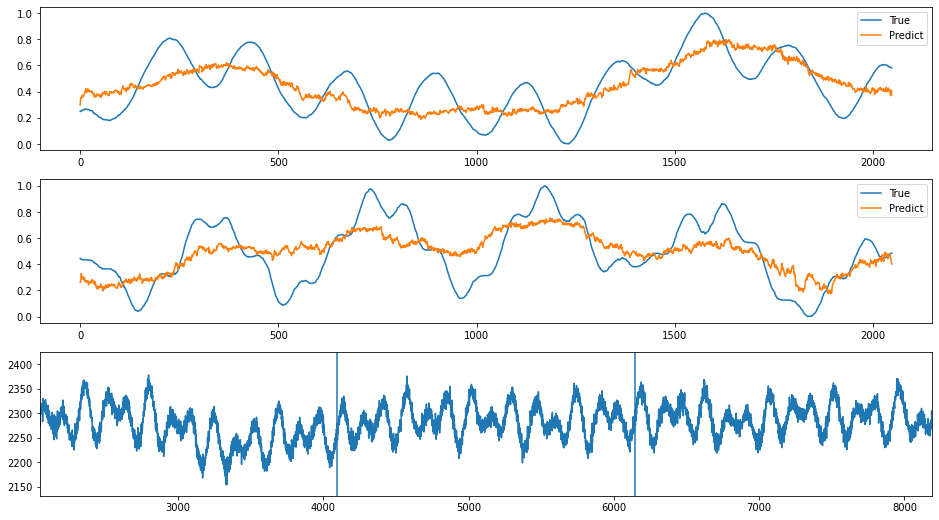

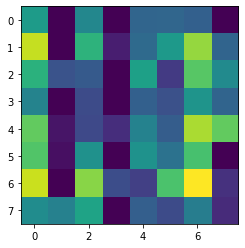

index: 201836
Error: 0.028354488245876937
type                                                         Inst
fill                                                         7454
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-18 23:34:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7454/...
n_bunches                                                     480
bunch_index                                                   607
bunch_number                                                  108
ts_length                                                   65536
chunk                                                          23
Name: 6115, dtype: object


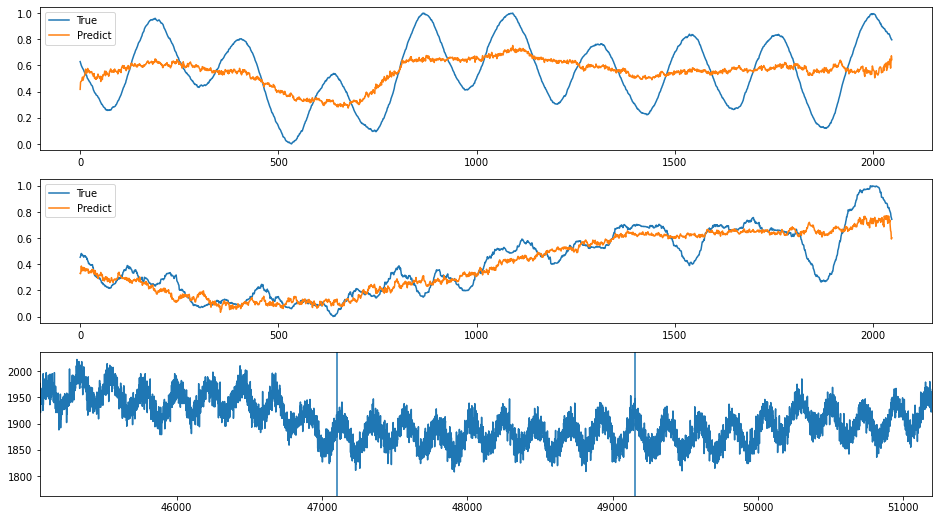

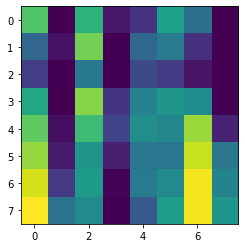

index: 332221
Error: 0.02795816508449238
type                                                         Inst
fill                                                         6184
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 23:55:53
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...
n_bunches                                                    1412
bunch_index                                                   825
bunch_number                                                  451
ts_length                                                   65536
chunk                                                           5
Name: 1450, dtype: object


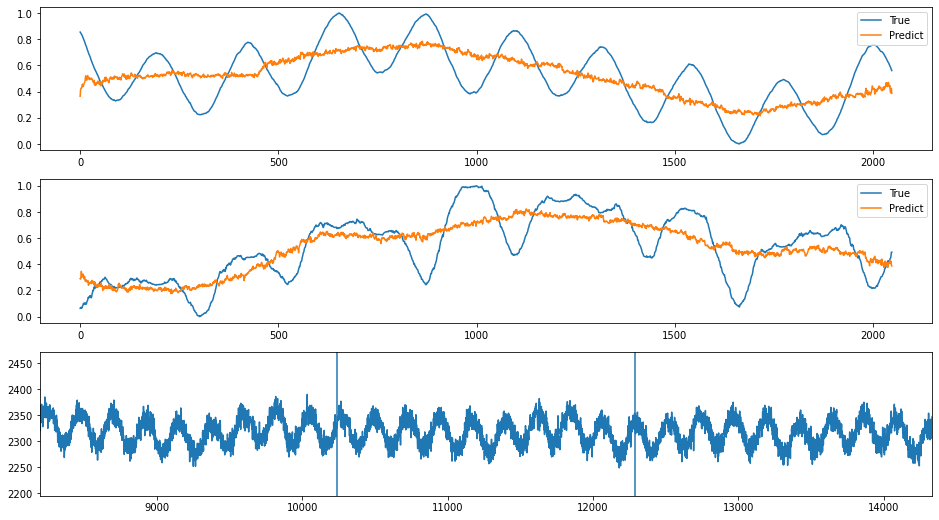

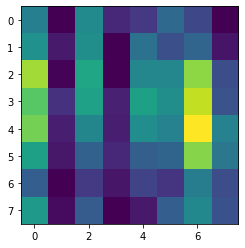

index: 43519
Error: 0.02781383976413848
type                                                         Inst
fill                                                         6382
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 15:42:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6382/...
n_bunches                                                     652
bunch_index                                                  1071
bunch_number                                                  346
ts_length                                                   65536
chunk                                                          15
Name: 3924, dtype: object


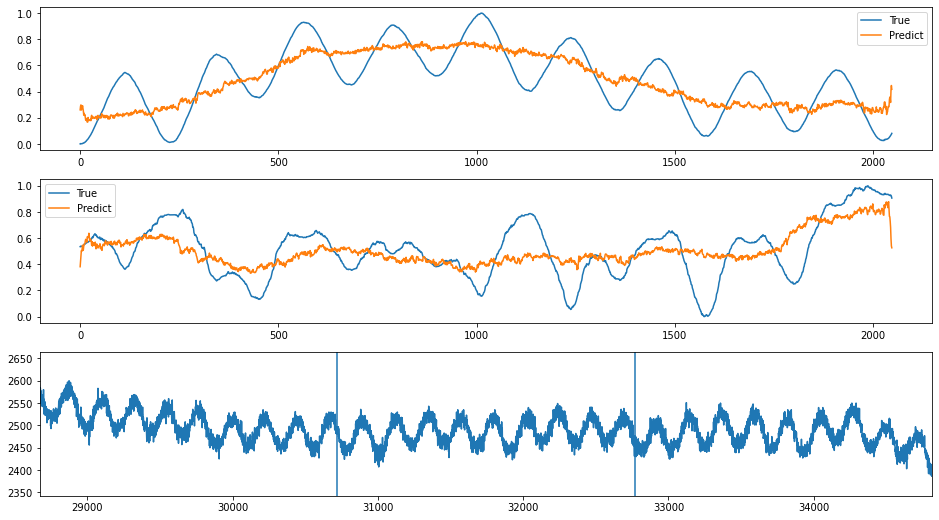

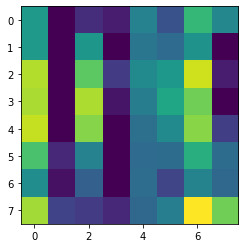

index: 379113
Error: 0.02775130829520437
type                                                         Inst
fill                                                         7468
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-23 19:21:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7468/...
n_bunches                                                     187
bunch_index                                                   175
bunch_number                                                   36
ts_length                                                   65536
chunk                                                          21
Name: 5598, dtype: object


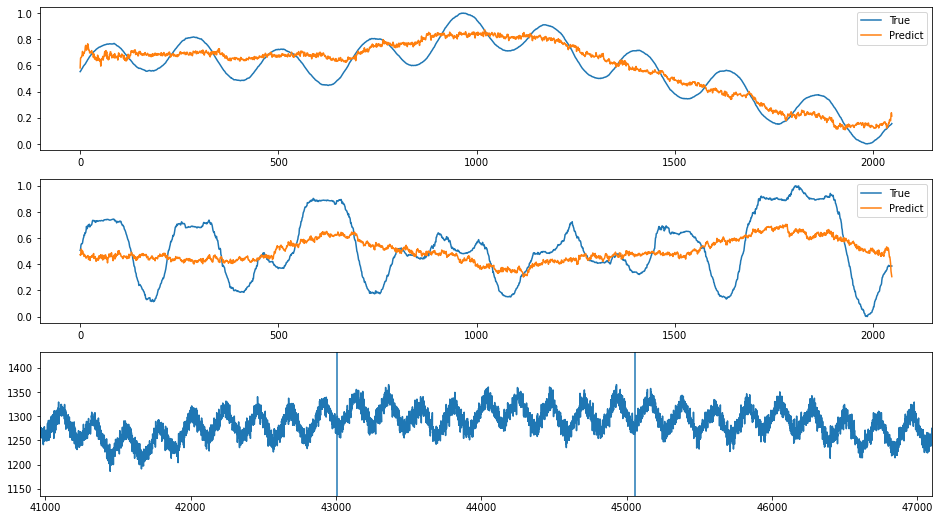

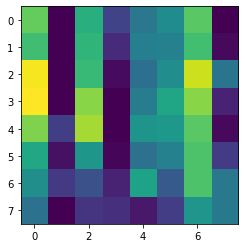

index: 153404
Error: 0.027691272073396615
type                                                         Inst
fill                                                         6184
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 23:55:53
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...
n_bunches                                                    1412
bunch_index                                                   173
bunch_number                                                   76
ts_length                                                   65536
chunk                                                           5
Name: 1465, dtype: object


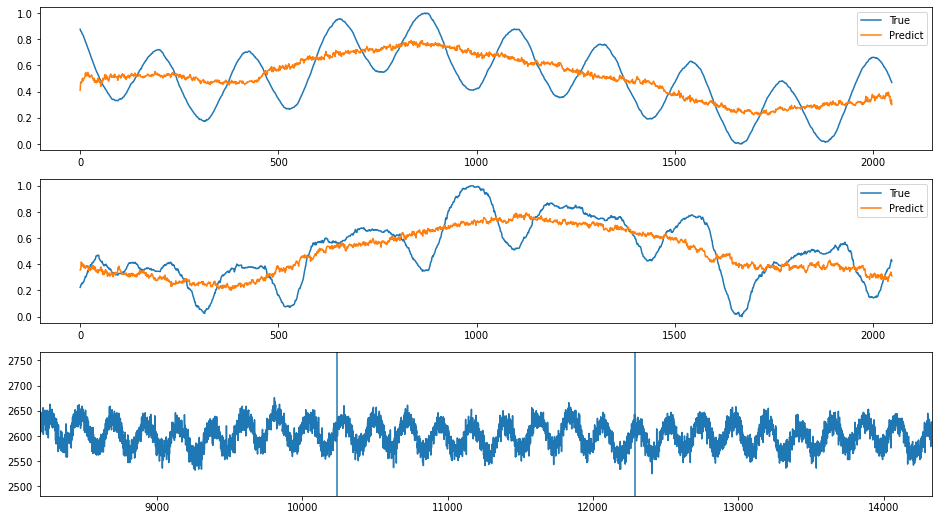

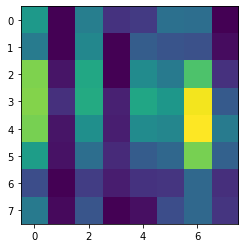

index: 77250
Error: 0.02769036706451504
type                                                         Inst
fill                                                         7139
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-08 19:17:08
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7139/...
n_bunches                                                    2556
bunch_index                                                  3068
bunch_number                                                 2270
ts_length                                                   65536
chunk                                                          16
Name: 4177, dtype: object


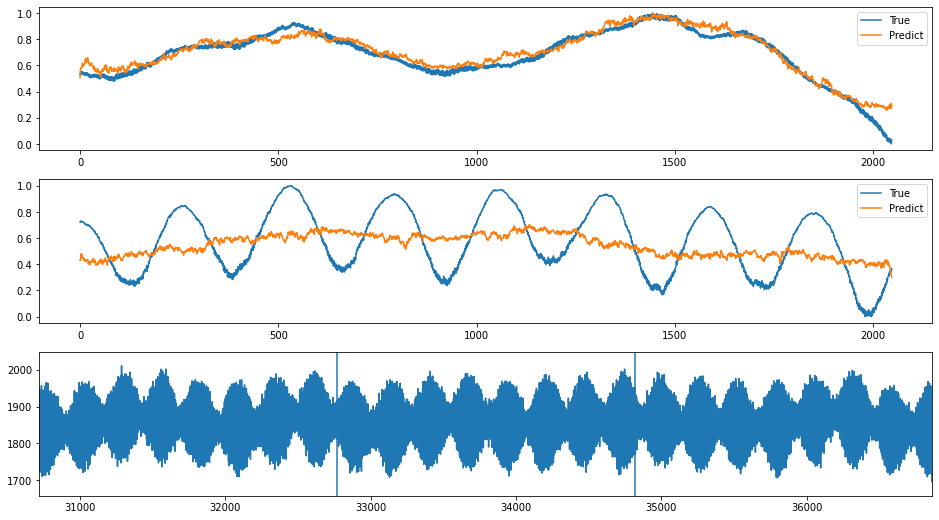

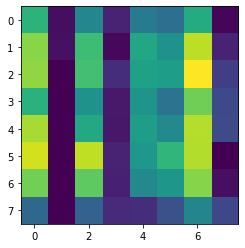

index: 290434
Error: 0.02748931579009044
type                                                         Inst
fill                                                         6396
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 22:16:24
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6396/...
n_bunches                                                    1164
bunch_index                                                   216
bunch_number                                                   47
ts_length                                                   65536
chunk                                                           8
Name: 2276, dtype: object


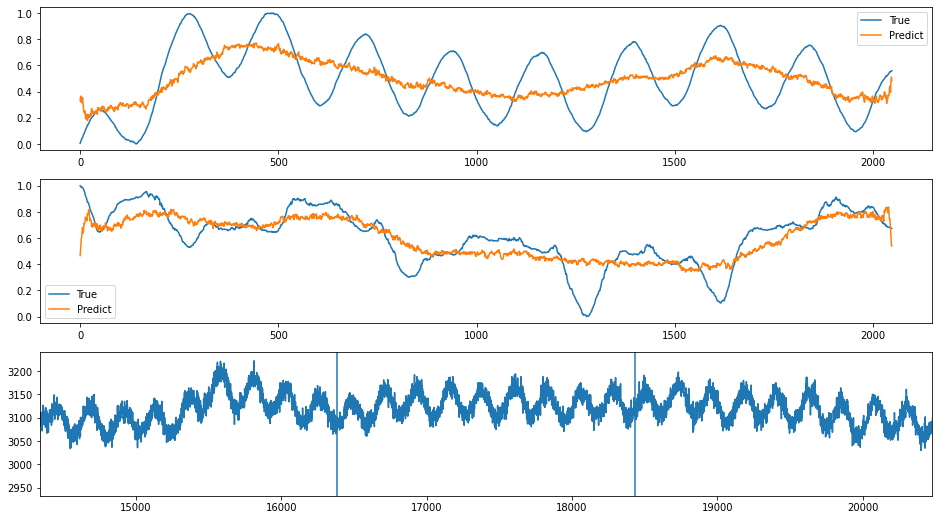

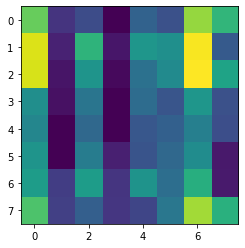

index: 273761
Error: 0.02740229817002149
type                                                         Inst
fill                                                         7036
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-07 20:37:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7036/...
n_bunches                                                     602
bunch_index                                                  1479
bunch_number                                                  490
ts_length                                                   65536
chunk                                                          16
Name: 4111, dtype: object


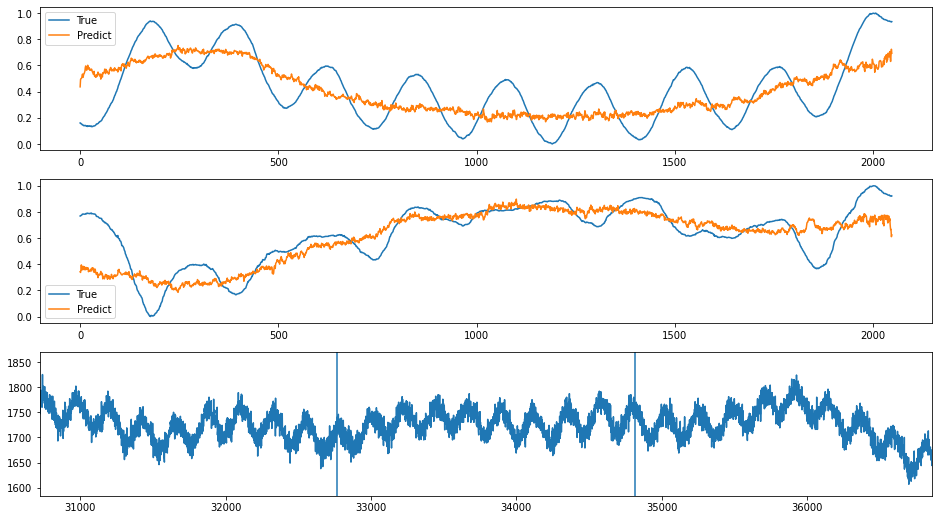

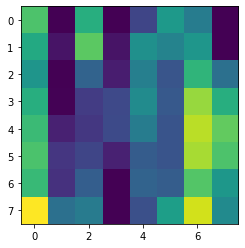

index: 377178
Error: 0.027395466504446613
type                                                         Inst
fill                                                         6220
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-17 22:16:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6220/...
n_bunches                                                     228
bunch_index                                                  1708
bunch_number                                                  155
ts_length                                                   65536
chunk                                                           5
Name: 1356, dtype: object


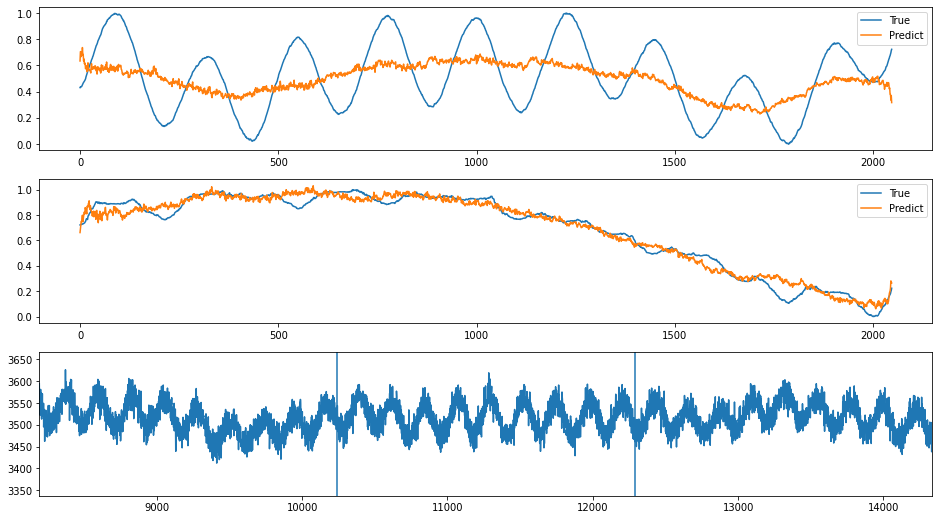

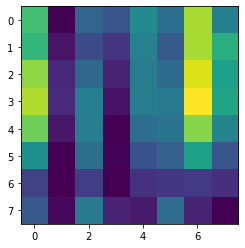

index: 157693
Error: 0.027153252078149503
type                                                         Inst
fill                                                         7157
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-13 01:42:24
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7157/...
n_bunches                                                     444
bunch_index                                                    99
bunch_number                                                   50
ts_length                                                   65536
chunk                                                          12
Name: 3289, dtype: object


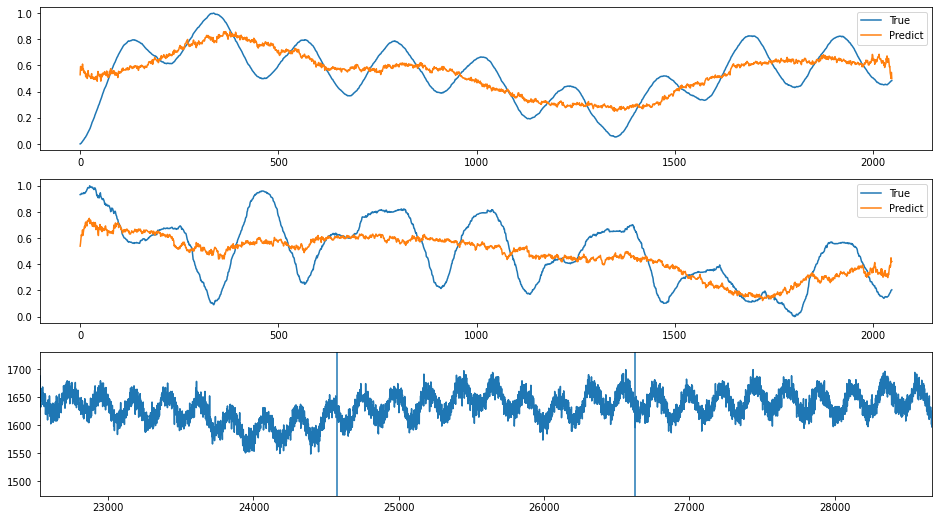

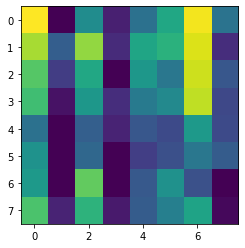

index: 289892
Error: 0.027039565471831863
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:50:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1520
bunch_number                                                   71
ts_length                                                   65536
chunk                                                          20
Name: 5326, dtype: object


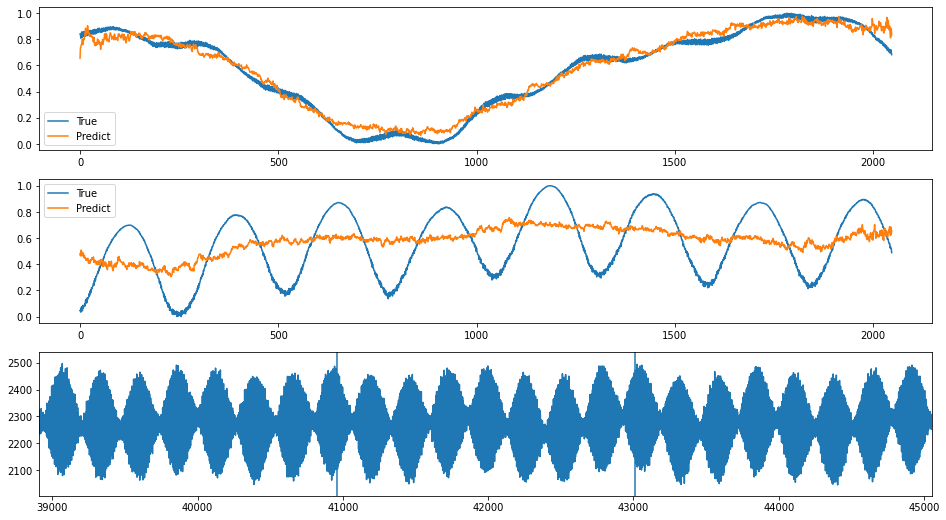

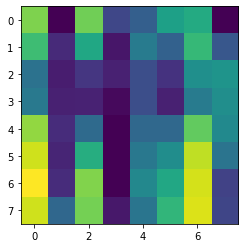

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 15637
Error: 0.002712713694490841
type                                                         Inst
fill                                                         6805
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-16 02:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6805/...
n_bunches                                                     588
bunch_index                                                   838
bunch_number                                                  365
ts_length                                                   65536
chunk                                                          10
Name: 2602, dtype: object


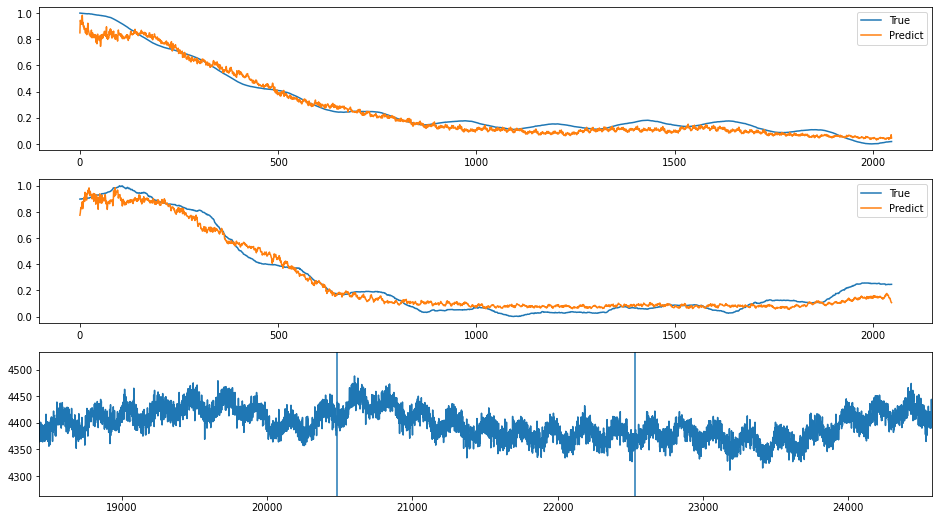

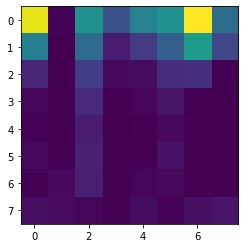

index: 156757
Error: 0.002712734085229935
type                                                         Inst
fill                                                         6279
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 09:14:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6279/...
n_bunches                                                    1868
bunch_index                                                   702
bunch_number                                                  380
ts_length                                                   65536
chunk                                                          18
Name: 4684, dtype: object


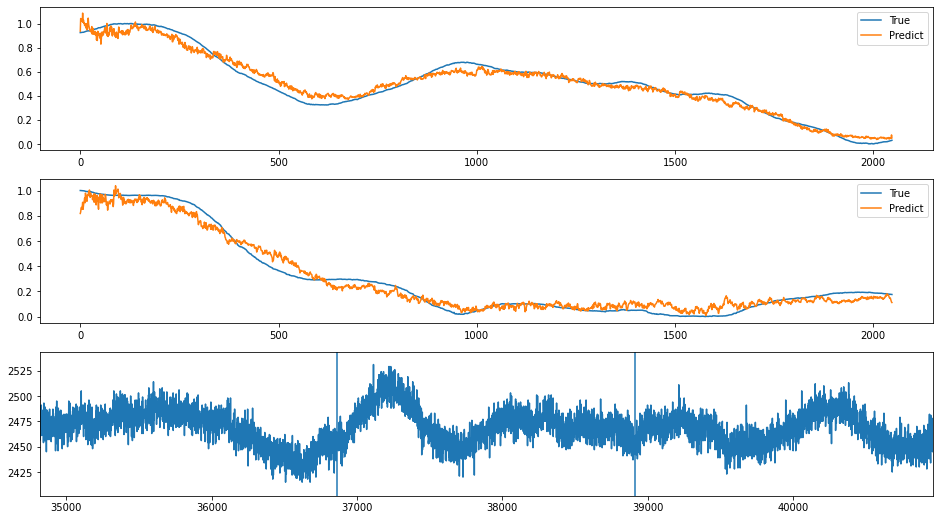

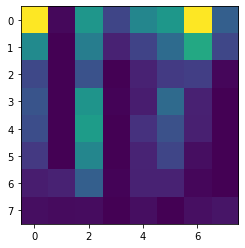

index: 370879
Error: 0.0027127413009008896
type                                                         Inst
fill                                                         7160
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-13 06:27:04
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7160/...
n_bunches                                                     108
bunch_index                                                    64
bunch_number                                                   15
ts_length                                                   65536
chunk                                                          16
Name: 4159, dtype: object


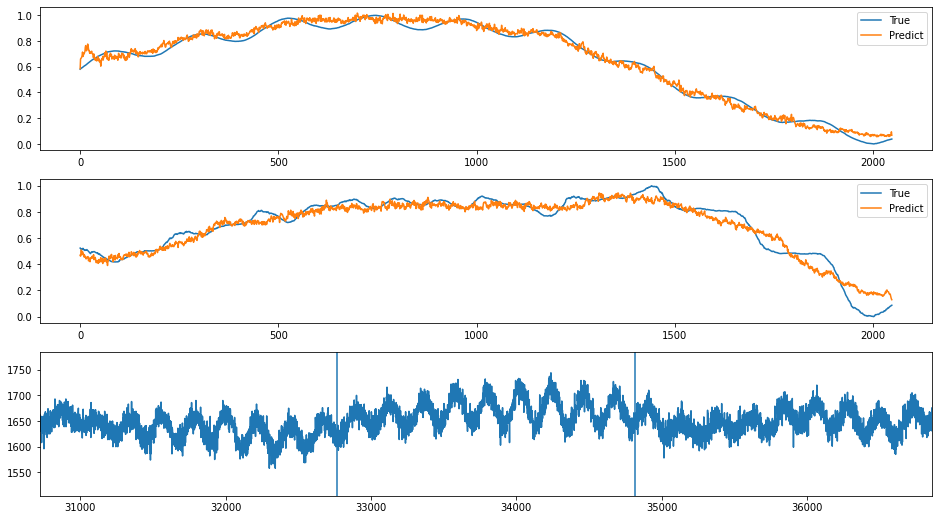

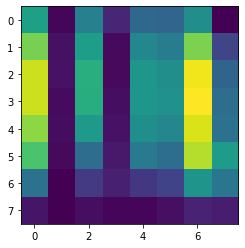

index: 142293
Error: 0.002712698671442
type                                                         Inst
fill                                                         6628
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-01 06:36:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6628/...
n_bunches                                                    1551
bunch_index                                                  2258
bunch_number                                                 1050
ts_length                                                   65536
chunk                                                           2
Name: 749, dtype: object


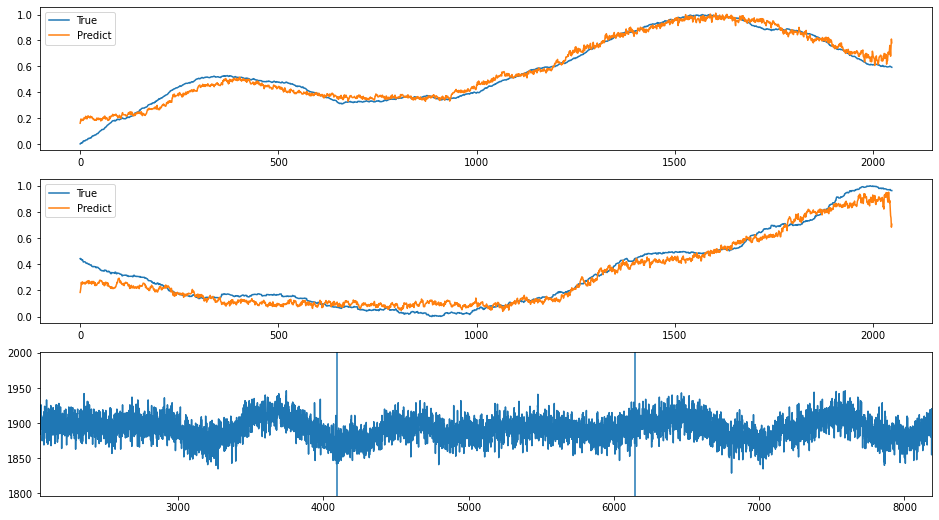

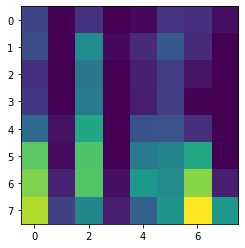

index: 88121
Error: 0.0027127422874173575
type                                                         Inst
fill                                                         6809
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-16 05:58:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6809/...
n_bunches                                                     156
bunch_index                                                   319
bunch_number                                                  122
ts_length                                                   65536
chunk                                                          12
Name: 3095, dtype: object


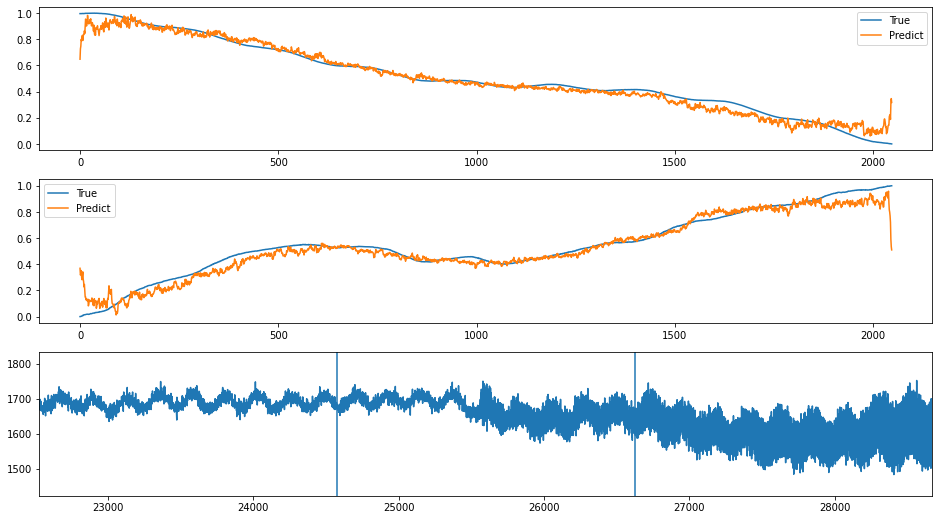

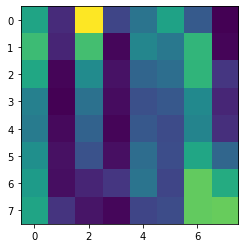

index: 70380
Error: 0.0027126953436988066
type                                                         Inst
fill                                                         6849
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-26 18:09:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6849/...
n_bunches                                                     458
bunch_index                                                  1252
bunch_number                                                  240
ts_length                                                   65536
chunk                                                           6
Name: 1575, dtype: object


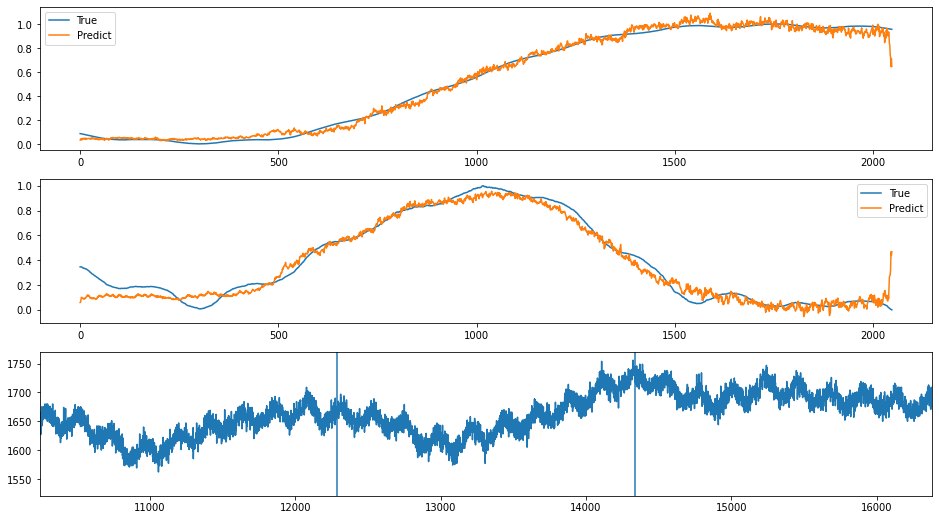

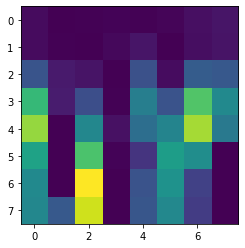

index: 166465
Error: 0.002712684604906584
type                                                         Inst
fill                                                         6663
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-10 17:01:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6663/...
n_bunches                                                    2556
bunch_index                                                  1962
bunch_number                                                 1443
ts_length                                                   65536
chunk                                                           5
Name: 1456, dtype: object


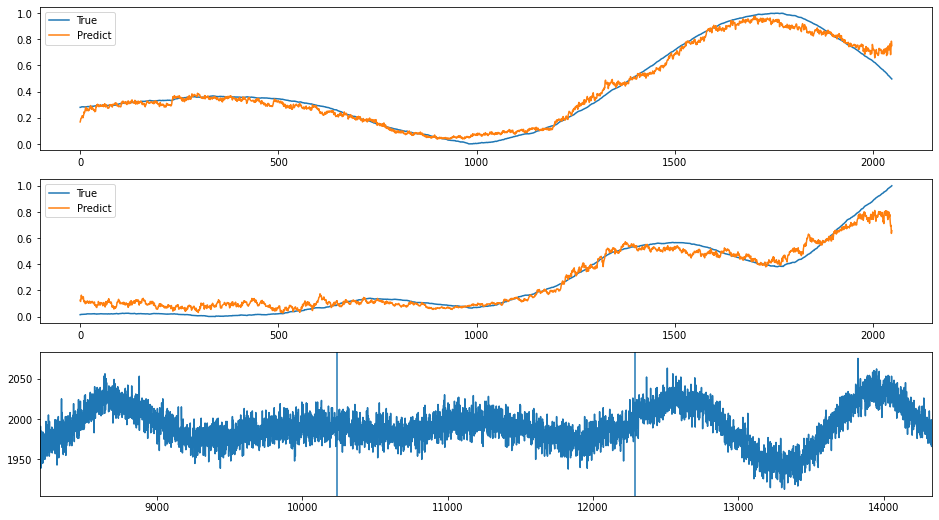

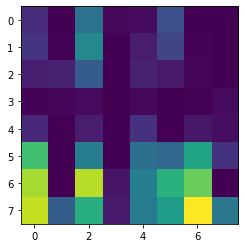

index: 124799
Error: 0.0027127583210794616
type                                                         Inst
fill                                                         6696
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-18 05:36:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6696/...
n_bunches                                                    2556
bunch_index                                                   617
bunch_number                                                  421
ts_length                                                   65536
chunk                                                           3
Name: 863, dtype: object


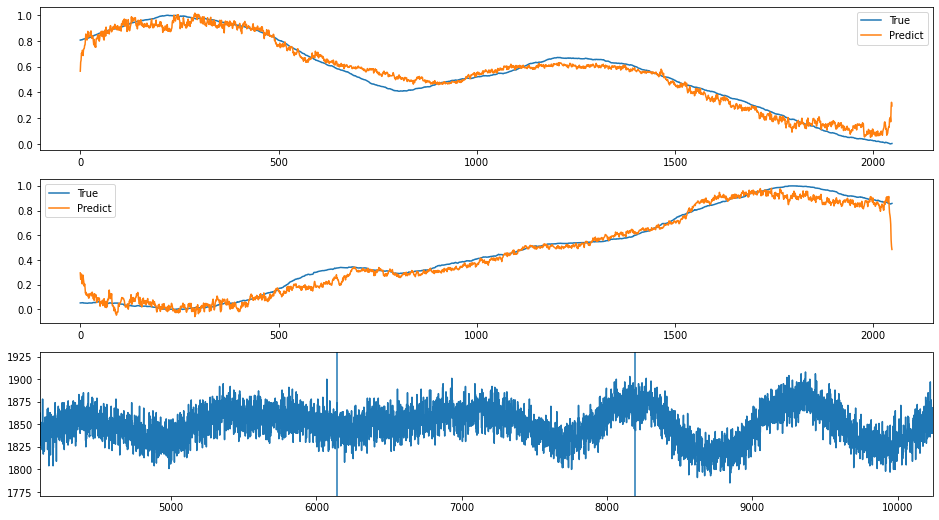

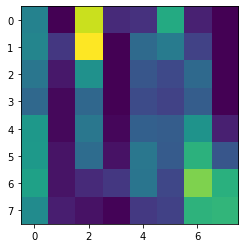

index: 308948
Error: 0.0027127583950864688
type                                                         Inst
fill                                                         6799
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-15 10:03:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6799/...
n_bunches                                                     157
bunch_index                                                   201
bunch_number                                                   14
ts_length                                                   65536
chunk                                                          16
Name: 4303, dtype: object


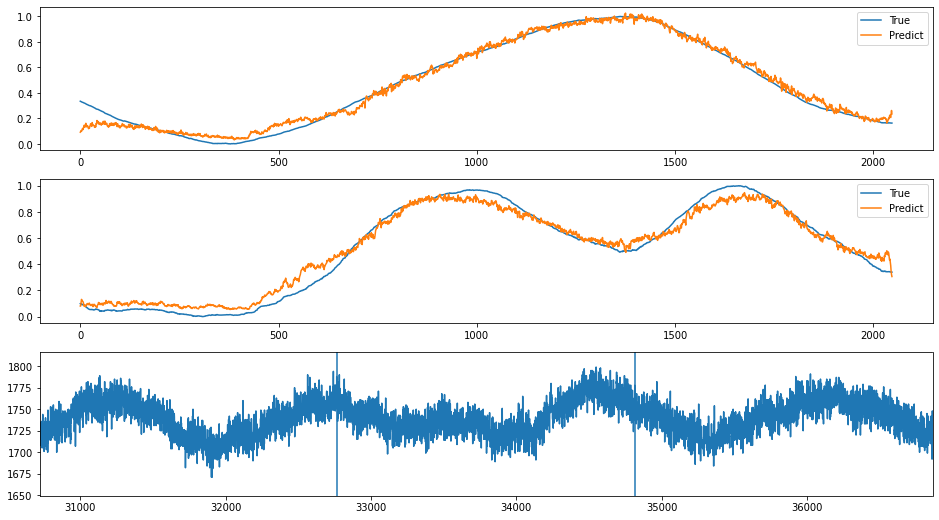

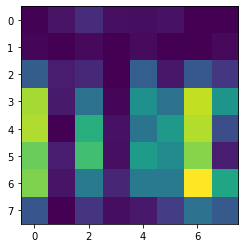

index: 285351
Error: 0.002712762144234296
type                                                         Inst
fill                                                         6588
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-21 16:33:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6588/...
n_bunches                                                     228
bunch_index                                                   181
bunch_number                                                  133
ts_length                                                   65536
chunk                                                          27
Name: 6993, dtype: object


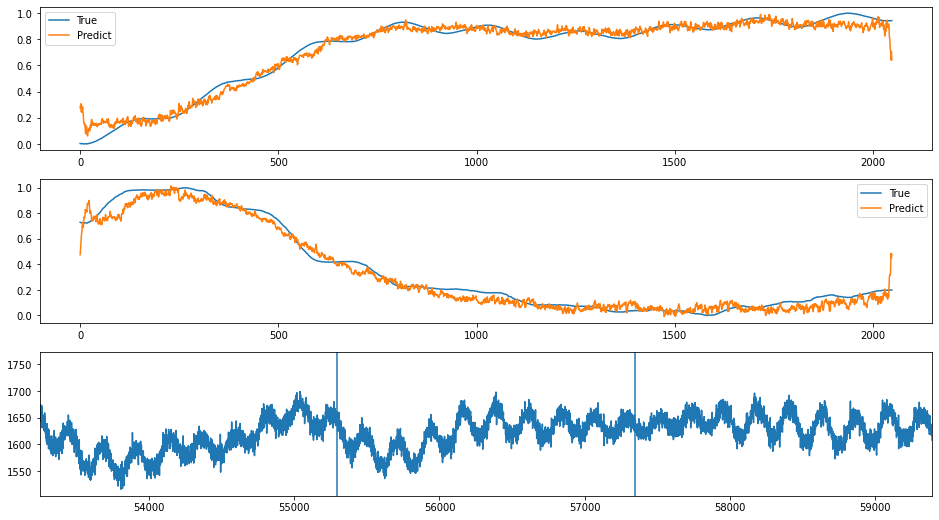

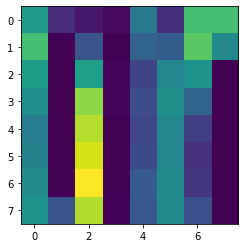

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
encoded = checker.encode(encoding_true)
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 64)

In [34]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

In [35]:
import sklearn
from sklearn.manifold import TSNE

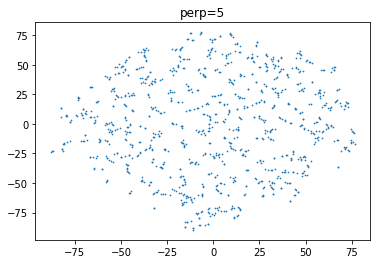

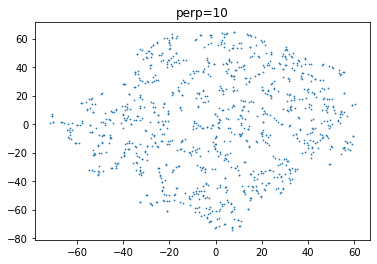

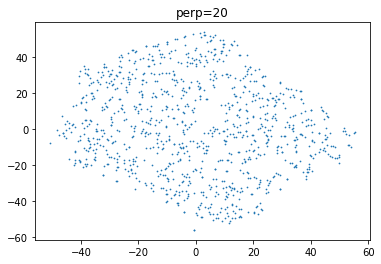

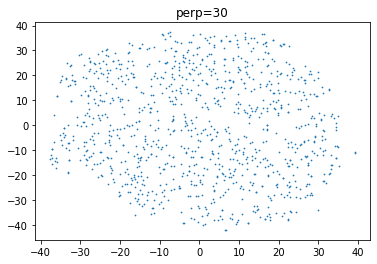

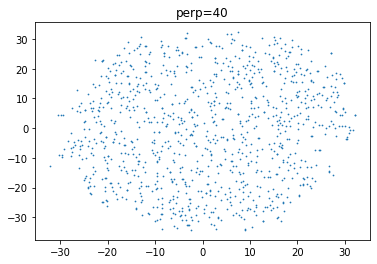

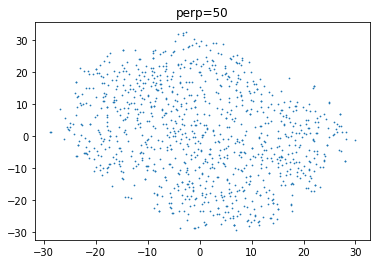

In [36]:
for perplexity in [5, 10, 20, 30, 40, 50]: 
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [37]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

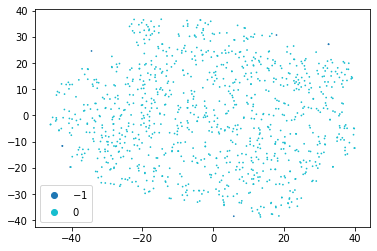

cluster -1
N samples: 8


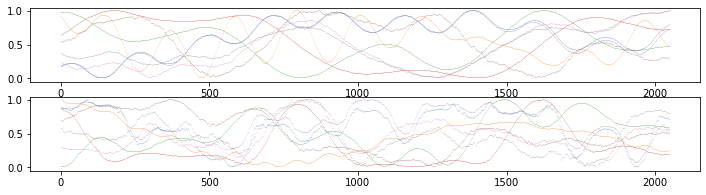

cluster 0
N samples: 1016


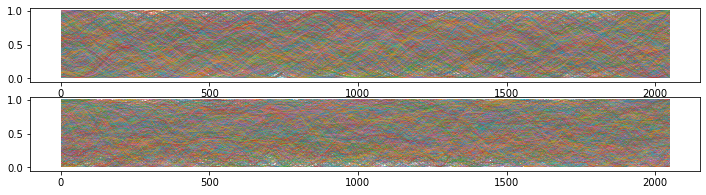

In [38]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4)
clustering = dbscan.fit(encoded_2d_tsne)
sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
plt.legend(*sc.legend_elements())
plt.show()
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    fig, axes = plot_clusters(cluster_indices)
    plt.show()